<a href="https://colab.research.google.com/github/albertfast/lunar_lender_v3/blob/main/lunar_lender_v3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 🛰️ Lena and the Lunar Landing Team: A Mission with Reinforcement Learning

---

### Part 1: The Lonely Mission

**The control room was silent.**  
Outside the dome, the moon stretched into an endless desert of shadows and silence. But inside, Lena sat still, her eyes locked on rows of shifting telemetry.

The last mission had failed. Another lander, lost to the dust.

**Every failed descent burned through the colony’s dwindling fuel reserves.** Every crash was a step closer to total isolation. And now, everything depended on the next simulation.

She wasn’t truly alone.

On her screen blinked five lunar lander agents — digital minds trained to master gravity itself. They were raw, unpredictable, yet full of potential.

Before they could learn, Lena had to decide:  
**How do you teach a machine to survive the moon?**

She adjusted sliders. Learning rate. Discount factor. Epsilon decay.  
One tweak could make the difference between glory and disaster.

Taking a breath, Lena hovered her hand over the launch command.

> *“Let’s see what you’ve got, team...”*


Mounted at /content/drive


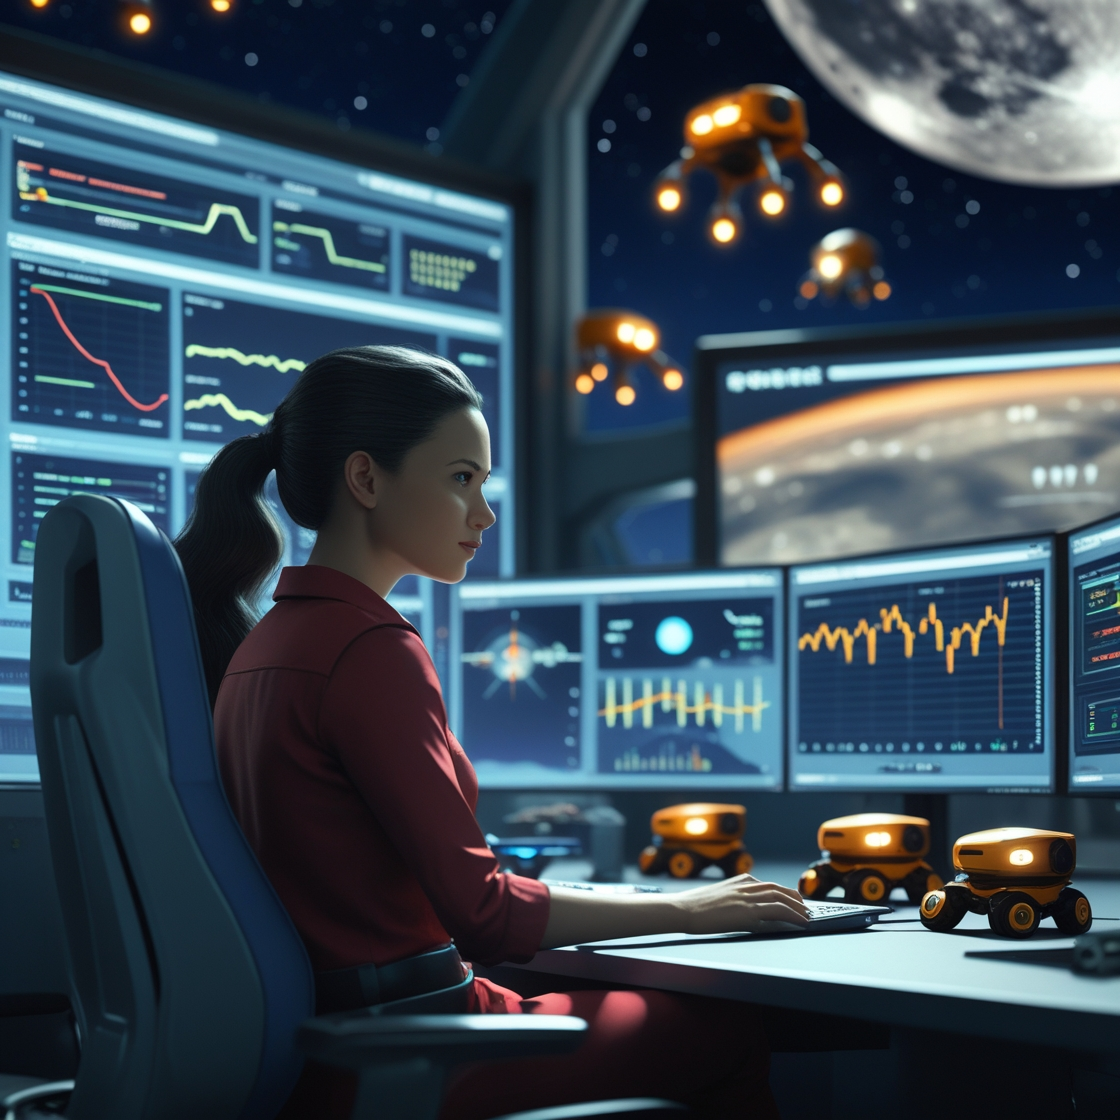

In [1]:
from google.colab import drive
drive.mount('/content/drive')
from IPython.display import display, Image
Lena = "/content/drive/MyDrive/ColabNotebooks/static/Lena.jpg"
display(Image(filename=Lena))

## 🧪 Part 2: Hyperparameter Control Panel

In front of Lena was a panel with three sliders, each controlling a key aspect of how the agents would learn. She knew that these hyperparameters would deeply influence the behavior and success of the lunar landers:

---

### 🔹 Learning Rate ($\\alpha$)

This controls how fast the agent updates its knowledge after each step. A **high** learning rate helps the agent adapt quickly to new situations, but if it's too high, learning becomes unstable. A **low** learning rate ensures smoother updates but may make learning very slow.

- Too low: the agent learns too slowly.
- Too high: the agent forgets too easily or behaves erratically.

> Example:  
> $\\alpha = 0.001$ → stable but slow  
> $\\alpha = 0.1$ → fast but risky  

---

### 🔹 Discount Factor ($\\gamma$)

This defines how much future rewards matter compared to immediate rewards. It’s a value between $0$ and $1$:

- $\\gamma \\approx 1$ → the agent plans long-term (values future rewards).
- $\\gamma \\approx 0.8$ → the agent prefers short-term results.

A very low $\\gamma$ may cause the agent to ignore good strategies that pay off later, leading to short-sighted behavior.

---

### 🔹 Epsilon Decay Rate ($\\varepsilon$ decay)

$\\varepsilon$ represents the probability of **exploration**—choosing random actions instead of following the learned policy. The agent starts with $\\varepsilon = 1.0$ (fully random) and gradually reduces it:

- A **slower** decay (e.g., $\\varepsilon \\times 0.995$ per episode) gives the agent more time to explore.
- A **faster** decay (e.g., $\\varepsilon \\times 0.95$) leads to early exploitation and can cause the agent to get stuck in a suboptimal strategy.

---

Lena carefully adjusted each slider, understanding that:

- $\\alpha$ affects **how fast** the landers learn,
- $\\gamma$ affects **what kind** of rewards they value,
- and $\\varepsilon$ decay affects **how long** they stay curious.

Getting the balance right was essential.

Below is the interactive panel Lena used in Colab. She would test different settings and observe how her agents learned to land—or crash.


In [2]:
# Hyperparameter Control Panel
import ipywidgets as widgets
from IPython.display import display

# Learning rate: log-scale slider from 1e-5 to 1e-2
learning_rate_slider = widgets.FloatLogSlider(
    value=1e-3, base=10, min=-5, max=-2, step=0.1,
    description="Learning Rate",
    continuous_update=True
)

# Discount factor (gamma): slider from 0.80 to 0.999
gamma_slider = widgets.FloatSlider(
    value=0.99, min=0.80, max=0.999, step=0.001,
    description="Gamma (Discount)"
)

# Epsilon decay rate: slider from 0.90 to 0.999
epsilon_slider = widgets.FloatSlider(
    value=0.99, min=0.90, max=0.999, step=0.001,
    description="Epsilon Decay"
)

# Display the sliders
display(learning_rate_slider, gamma_slider, epsilon_slider)

FloatLogSlider(value=0.001, description='Learning Rate', max=-2.0, min=-5.0)

FloatSlider(value=0.99, description='Gamma (Discount)', max=0.999, min=0.8, step=0.001)

FloatSlider(value=0.99, description='Epsilon Decay', max=0.999, min=0.9, step=0.001)

# 📦 Install dependencies

In [25]:
print("Updating package lists and installing system dependencies (swig, cmake)...")
print("System dependencies installed.")
!apt-get update > /dev/null 2>&1
!apt-get install -y swig cmake > /dev/null 2>&1

Updating package lists and installing system dependencies (swig, cmake)...
System dependencies installed.


In [26]:
print("\nInstalling Python packages (numpy, gym, box2d, pygame, imageio, ipywidgets, tqdm, matplotlib, torch)...")
# Combine all pip install commands
# Note: Using gym[box2d] as requested and seen in the training script.
# Pinned numpy version included as requested.
!pip install numpy==1.23.5 gym[box2d] pygame imageio imageio-ffmpeg ipywidgets tqdm matplotlib torch > /dev/null 2>&1
print("Python packages installed.")
!pip install "gymnasium[box2d]"
!pip install swig


Installing Python packages (numpy, gym, box2d, pygame, imageio, ipywidgets, tqdm, matplotlib, torch)...
Python packages installed.
/bin/bash: -c: line 1: unexpected EOF while looking for matching `"'
/bin/bash: -c: line 2: syntax error: unexpected end of file
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 28.4 MB/s eta 0:00:00


## 🌕 Part 3: Training and Simulation

Lena didn’t train just one lander — she trained **five agents** at once. Her goal wasn’t perfection from one model, but to **increase the chance that at least one lander would learn** how to land safely.

Each agent used the same **Deep Q-Learning** algorithm, but trained independently on its own experiences. They all started with a blank mind and faced the same mission: land a small spacecraft softly on the Moon.

---

### 🎯 The Objective

Every simulation (called an *episode*) began with the lander placed at a random height, angle, and velocity. The task was to land gently near the center.

- ✅ A successful landing earns **+100 to +140 points**  
- ❌ Crashing gives a **-100 penalty**  
- 🔋 Firing any engine reduces reward slightly (fuel cost)  
- 🦶 Touching down with both legs adds a **+10 bonus**  

> 📖 *Source: [Gym Documentation](https://www.gymlibrary.dev/environments/box2d/lunar_lander/)*  
> An average score above **200** means the task is **solved**.

---

### 🧠 How the Agents Learn

Each lander sees an **8-dimensional state vector** (position, velocity, angle, etc.) and chooses from 4 actions:

1. Do nothing  
2. Fire the main engine  
3. Fire the left thruster  
4. Fire the right thruster  

At the beginning, actions are **random** ($\\varepsilon = 1.0$). As training progresses, the agents rely more on **Q-values**, which estimate the long-term reward of each action in a given state.

This balance between **exploration** (trying new things) and **exploitation** (using what’s known) is controlled by **epsilon decay**.

> Q-values are predicted by a neural network — this is the essence of the **Deep Q-Network (DQN)** method.

---

### ⚙️ Simplified Training

Although many modern agents use **experience replay** (a memory buffer), Lena chose a faster method: **online learning**. Each lander updates itself step-by-step, immediately after each action.

This approach makes training faster — especially in Colab — while still allowing agents to learn stable landing strategies over time.

### 🛠️ Mission Control Panel: Agent Personality Presets

Lena smiled as she hovered over the test panel.

> “Let’s try giving Luna and her team a few different personalities...” she whispered.

Below are 4 **pre-configured mission modes** you can test.  
Each represents a different **training personality** for your lunar landers.

Just **uncomment** the values under one and run the training cell again.

---

#### 🌙 Option 1: "The Cautious Learner"
🧠 Learns slowly but steadily, great for avoiding wild swings.


lr = 5e-4              # Lower learning rate
epsilon_decay = 0.999  # Slower exploration decay


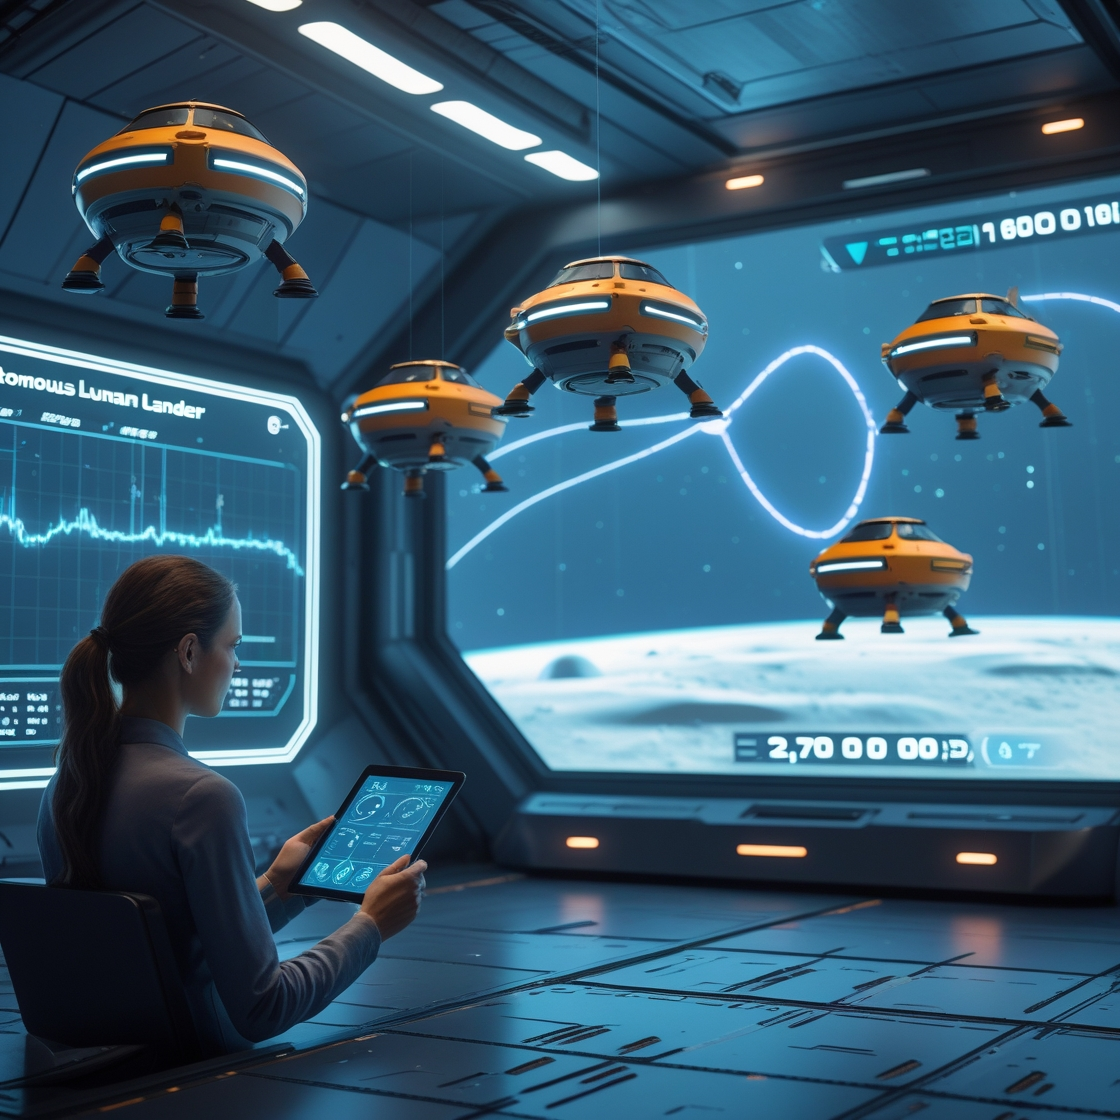

In [27]:
from IPython.display import display, Image
Moon = "/content/drive/MyDrive/ColabNotebooks/static/Moon.jpg"
display(Image(filename=Moon))

In [42]:
import ipywidgets as widgets
from IPython.display import display
import gym
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from collections import deque
from tqdm import tqdm
import random
import os
import pickle
import gymnasium as gym

In [43]:
# --- Hyperparameter Dictionary ---
# Central place to manage all hyperparameters
hyperparams = {
    "episodes": 500,
    "batch_size": 512,
    "gamma": 0.96,         # Default discount factor
    "lr": 1e-3,            # Default learning rate
    "epsilon_start": 0.99,
    "epsilon_min": 0.05,
    "epsilon_decay": 0.995, # Default epsilon decay
    "buffer_size": 50000,
    "target_update_freq": 10, # How often to update the target network (in episodes)
    "hidden_layers": 128,  # Size of the hidden layers in the DQN
    "seed": 42,
    "buffer_load_path": "/content/drive/MyDrive/ColabNotebooks/lunar_outputs/buffers/buffer_best_3500.pkl", # Set to a path like "./replay_buffer.pkl" to load
    "buffer_save_path": "/content/drive/MyDrive/ColabNotebooks/lunar_outputs/buffers"  # Set to a path to save the buffer, or None
}

# --- Hyperparameter Control Panel (ipywidgets) ---
print("--- Adjust Hyperparameters ---")


--- Adjust Hyperparameters ---


In [40]:
!pip install "gymnasium[box2d]"
!pip install swig

In [ ]:
# --- Hyperparameter Control Panel (ipywidgets) ---
print("--- Adjust Hyperparameters ---")

env = gym.make("LunarLander-v3")

# Learning rate: log-scale slider from 1e-5 to 1e-2
learning_rate_slider = widgets.FloatLogSlider(
    value=hyperparams['lr'], base=10, min=-5, max=-2, step=0.1,
    description="Learning Rate", continuous_update=False, readout_format='.5f'
)

# Discount factor (gamma): slider from 0.80 to 0.999
gamma_slider = widgets.FloatSlider(
    value=hyperparams['gamma'], min=0.80, max=0.999, step=0.001,
    description="Gamma (Discount)", continuous_update=False, readout_format='.3f'
)

# Epsilon decay rate: slider from 0.90 to 0.999
epsilon_decay_slider = widgets.FloatSlider(
    value=hyperparams['epsilon_decay'], min=0.90, max=0.999, step=0.001,
    description="Epsilon Decay", continuous_update=False, readout_format='.3f'
)

# Display the sliders
display(learning_rate_slider, gamma_slider, epsilon_decay_slider)

# --- DQN Model Definition (v3 Style) ---
class DQN(nn.Module):
    def __init__(self, n_observations, n_actions, hidden_size):
        super(DQN, self).__init__()
        # Using the hidden_size parameter passed during initialization
        self.layer1 = nn.Linear(n_observations, hidden_size)
        self.layer2 = nn.Linear(hidden_size, hidden_size)
        self.layer3 = nn.Linear(hidden_size, n_actions)

    def forward(self, x):
        x = F.relu(self.layer1(x))
        x = F.relu(self.layer2(x))
        return self.layer3(x) # Output raw Q-values

# --- Training Function ---
# Encapsulate training logic in a function for clarity
def train_dqn():
    print("\n--- Reading Hyperparameters from Sliders ---")
    hyperparams['lr'] = learning_rate_slider.value
    hyperparams['gamma'] = gamma_slider.value
    hyperparams['epsilon_decay'] = epsilon_decay_slider.value

    print("\n--- Starting Training with Hyperparameters ---")
    for key, val in hyperparams.items():
        print(f"- {key}: {val}")
    print("----------------------------------------------\n")

    # Initialize environment

    random.seed(hyperparams['seed'])
    np.random.seed(hyperparams['seed'])
    torch.manual_seed(hyperparams['seed'])
    if torch.cuda.is_available():
        torch.cuda.manual_seed_all(hyperparams['seed']) # Seed GPU too if available

    # Set device
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    print(f"Using device: {device}")

    n_actions = env.action_space.n
    n_obs = env.observation_space.shape[0]

    # Initialize agent networks using hyperparams['hidden_layers']
    policy_net = DQN(n_obs, n_actions, hyperparams['hidden_layers']).to(device)
    target_net = DQN(n_obs, n_actions, hyperparams['hidden_layers']).to(device)
    target_net.load_state_dict(policy_net.state_dict())
    target_net.eval()

    # Initialize optimizer
    optimizer = optim.AdamW(policy_net.parameters(), lr=hyperparams['lr'], amsgrad=True)

    # --- Replay Buffer Initialization (Load or Create New) ---
    replay_buffer = deque(maxlen=hyperparams['buffer_size'])
    buffer_loaded = False
    if hyperparams['buffer_load_path'] and os.path.exists(hyperparams['buffer_load_path']):
        # Inside the buffer loading block:
          try:
              # Try loading with torch.load, mapping to the current device
              replay_buffer_loaded = torch.load(
                  hyperparams['buffer_load_path'],
                  map_location=device # device is 'cpu' or 'cuda'
              )
              # Assuming the loaded object IS the deque
              if isinstance(replay_buffer_loaded, deque):
                  replay_buffer = replay_buffer_loaded
                  # ... (rest of the size/maxlen check) ...
                  print(f"Successfully loaded buffer using torch.load ...")
                  buffer_loaded = True
              else:
                  # If torch.load loaded something else (e.g., a dict containing the buffer)
                  # you'll need to adjust this part based on how it was saved.
                  print("Loaded object is not a deque. Trying pickle...")
                  raise TypeError("Loaded object not a deque")

          except Exception as e_torch:
              print(f"torch.load failed: {e_torch}. Trying standard pickle...")
              try:
                  # Fallback to standard pickle (might still fail if torch internals are saved)
                  with open(hyperparams['buffer_load_path'], 'rb') as f:
                      replay_buffer = pickle.load(f)
                  # ... (rest of the size/maxlen check) ...
                  print(f"Successfully loaded buffer using pickle.load ...")
                  buffer_loaded = True
              except Exception as e_pickle:
                  print(f"Standard pickle.load also failed: {e_pickle}. Starting empty.")
                  replay_buffer = deque(maxlen=hyperparams['buffer_size'])

# --- Add ANSI Color Codes ---
class Colors:
    RESET = '\033[0m'
    RED = '\033[91m'
    GREEN = '\033[92m'
    YELLOW = '\033[93m'
    BLUE = '\033[94m'
    MAGENTA = '\033[95m'
    CYAN = '\033[96m'

# --- Training Function (Modified) ---
def train_dqn():
    print(f"{Colors.CYAN}--- Reading Hyperparameters from Sliders ---{Colors.RESET}")
    # Keep slider reading logic...
    hyperparams['lr'] = learning_rate_slider.value
    hyperparams['gamma'] = gamma_slider.value
    hyperparams['epsilon_decay'] = epsilon_decay_slider.value

    print(f"\n{Colors.CYAN}--- Starting Training with Hyperparameters ---{Colors.RESET}")
    for key, val in hyperparams.items():
        # Highlight potentially problematic paths
        if 'path' in key and val:
             print(f"- {key}: {Colors.YELLOW}{val}{Colors.RESET}")
        else:
             print(f"- {key}: {val}")
    print("----------------------------------------------\n")

    # Initialize environment (MAKE SURE TO USE THE CORRECT VERSION gymnasium RECOMMENDS)
    try:
        env = gym.make("LunarLander-v3") # Or "LunarLander" if v3 doesn't exist yet
        print(f"{Colors.GREEN}Successfully created environment 'LunarLander-v3'{Colors.RESET}")
    except Exception as e:
        print(f"{Colors.RED}Error creating environment: {e}{Colors.RESET}")
        print(f"{Colors.YELLOW}Ensure 'gymnasium[box2d]' is installed correctly.{Colors.RESET}")
        return None # Stop if env creation fails

    # Seeding (Corrected for Gymnasium)
    seed = hyperparams.get('seed', 42) # Use .get for safety
    random.seed(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    # Note: env seeding happens in env.reset(seed=...)

    # Set device
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    print(f"Using device: {device}")

    n_actions = env.action_space.n
    n_obs = env.observation_space.shape[0]

    # Initialize agent networks
    policy_net = DQN(n_obs, n_actions, hyperparams['hidden_layers']).to(device)
    target_net = DQN(n_obs, n_actions, hyperparams['hidden_layers']).to(device)
    target_net.load_state_dict(policy_net.state_dict())
    target_net.eval()

    # Initialize optimizer
    optimizer = optim.AdamW(policy_net.parameters(), lr=hyperparams['lr'], amsgrad=True)

    # --- Replay Buffer Initialization (Load or Create New) ---
    replay_buffer = deque(maxlen=hyperparams['buffer_size'])
    buffer_loaded = False
    if hyperparams['buffer_load_path'] and os.path.exists(hyperparams['buffer_load_path']):
        print(f"{Colors.YELLOW}Attempting to load buffer from: {hyperparams['buffer_load_path']}{Colors.RESET}")
        try:
            # --- Use torch.load with weights_only=False ---
            # !!! WARNING: Only do this if you TRUST the source of the .pkl file !!!
            replay_buffer_loaded = torch.load(
                hyperparams['buffer_load_path'],
                map_location=device,
                weights_only=False  # <-- Key change: Allow loading arbitrary objects
            )
            # ---

            if isinstance(replay_buffer_loaded, deque):
                replay_buffer = replay_buffer_loaded
                # Ensure correct maxlen
                if replay_buffer.maxlen != hyperparams['buffer_size']:
                     print(f"{Colors.YELLOW}Warning: Loaded buffer maxlen ({replay_buffer.maxlen}) differs. Adjusting to {hyperparams['buffer_size']}.{Colors.RESET}")
                     new_buffer = deque(maxlen=hyperparams['buffer_size'])
                     new_buffer.extend(list(replay_buffer))
                     replay_buffer = new_buffer
                print(f"{Colors.GREEN}Successfully loaded replay buffer (Size: {len(replay_buffer)}) using torch.load(weights_only=False){Colors.RESET}")
                buffer_loaded = True
            else:
                print(f"{Colors.RED}Loaded object is not a deque. Type: {type(replay_buffer_loaded)}. Starting empty.{Colors.RESET}")
                replay_buffer = deque(maxlen=hyperparams['buffer_size'])

        except Exception as e_load:
            print(f"{Colors.RED}Error loading buffer: {e_load}. Starting empty.{Colors.RESET}")
            replay_buffer = deque(maxlen=hyperparams['buffer_size'])
    else:
        # Message if path specified but not found, or if no path specified
        if hyperparams['buffer_load_path']:
             print(f"{Colors.YELLOW}Buffer file not found: {hyperparams['buffer_load_path']}. Starting empty.{Colors.RESET}")
        else:
             print("No buffer load path specified. Starting empty.")
        replay_buffer = deque(maxlen=hyperparams['buffer_size'])


    # --- Training Loop ---
    reward_history = []
    best_reward = -float("inf")
    epsilon = hyperparams['epsilon_start']

    print(f"\n{Colors.CYAN}--- Starting Training Loop ---{Colors.RESET}")
    progress_bar = tqdm(range(hyperparams['episodes']), desc=f"{Colors.MAGENTA}Training Progress{Colors.RESET}")

    initial_fill_target = hyperparams['batch_size']
    steps_since_last_log = 0
    log_interval = 200 # Print a step log every N steps within an episode

    for ep in progress_bar:
        # Correct reset for gymnasium
        observation, info = env.reset(seed=seed + ep) # Per-episode seed
        state = np.array(observation, dtype=np.float32)
        total_reward = 0
        step_count = 0 # Track steps within episode

        # Log start of episode
        if ep < 5 or ep % 50 == 0: # Log more frequently early on
             print(f"{Colors.BLUE}Starting Episode {ep+1}...{Colors.RESET}")

        while True: # Loop replaced 'while not done:'
            step_count += 1
            steps_since_last_log += 1

            # --- Epsilon-greedy action selection (no changes needed) ---
            if random.random() < epsilon:
                action = env.action_space.sample()
            else:
                state_tensor = torch.tensor(state, dtype=torch.float32, device=device).unsqueeze(0)
                with torch.no_grad():
                    q_values = policy_net(state_tensor)
                    action = q_values.argmax(dim=1).item()

            # --- Step environment (Corrected for gymnasium) ---
            next_observation, reward, terminated, truncated, info = env.step(action)
            next_state = np.array(next_observation, dtype=np.float32)
            total_reward += reward
            done = terminated or truncated # Combine termination conditions

            # Store experience
            replay_buffer.append((state, action, reward, next_state, done))
            state = next_state

            # --- Perform Optimization Step (with logging) ---
            current_buffer_size = len(replay_buffer)
            if current_buffer_size >= initial_fill_target:
                if steps_since_last_log >= log_interval : # Log before optimization if interval met
                     print(f"  Ep {ep+1}, Step {step_count}: Buffer size {current_buffer_size}. Optimizing...")
                     steps_since_last_log = 0 # Reset log counter

                # Sample batch
                batch = random.sample(replay_buffer, hyperparams['batch_size'])
                states_b, actions_b, rewards_b, next_states_b, dones_b = zip(*batch)

                # Convert to tensors (no changes needed here)
                states_tensor = torch.tensor(np.array(states_b), dtype=torch.float32).to(device)
                actions_tensor = torch.tensor(actions_b, dtype=torch.int64).unsqueeze(1).to(device)
                rewards_tensor = torch.tensor(rewards_b, dtype=torch.float32).to(device)
                next_states_tensor = torch.tensor(np.array(next_states_b), dtype=torch.float32).to(device)
                dones_tensor = torch.tensor(dones_b, dtype=torch.bool).to(device)

                # Calculate TD Target (no changes needed)
                with torch.no_grad():
                    next_q_values = target_net(next_states_tensor).max(dim=1)[0]
                td_targets = rewards_tensor + (~dones_tensor) * hyperparams['gamma'] * next_q_values

                # Calculate Q-values & Loss (no changes needed)
                q_values = policy_net(states_tensor).gather(1, actions_tensor).squeeze()
                loss = F.mse_loss(q_values, td_targets)

                # Optimize
                optimizer.zero_grad()
                loss.backward()
                optimizer.step()

            elif steps_since_last_log >= log_interval: # Log buffer filling progress
                 print(f"  Ep {ep+1}, Step {step_count}: Filling buffer ({current_buffer_size}/{initial_fill_target})...")
                 steps_since_last_log = 0 # Reset log counter


            # Check if episode is done
            if done:
                break # Exit the inner while loop

        # --- End of Episode ---
        reward_history.append(total_reward)
        epsilon = max(hyperparams['epsilon_min'], epsilon * hyperparams['epsilon_decay'])

        # Update target network
        if ep % hyperparams['target_update_freq'] == 0:
            target_net.load_state_dict(policy_net.state_dict())
            if ep > 0: # Don't log the initial copy
                 print(f"{Colors.YELLOW}Target network updated at episode {ep+1}{Colors.RESET}")


        # Track best reward
        if total_reward > best_reward:
            best_reward = total_reward

        # Update progress bar description
        avg_reward_last_100 = np.mean(reward_history[-100:]) if len(reward_history) >= 100 else np.mean(reward_history) if reward_history else 0
        progress_bar.set_postfix({
            "Last Reward": f"{total_reward:.1f}",
            "Avg100": f"{avg_reward_last_100:.1f}",
            "Best": f"{best_reward:.1f}",
            "Eps": f"{epsilon:.3f}",
            "Buffer": len(replay_buffer)
        })
        # Add a specific log for end of episode to see reward immediately
        # Limit this log frequency too
        if ep < 5 or ep % 20 == 0:
            print(f"{Colors.GREEN}Ep {ep+1} finished. Reward: {total_reward:.2f}, Avg100: {avg_reward_last_100:.2f}, Epsilon: {epsilon:.3f}{Colors.RESET}")


    # --- End of Training ---
    print(f"\n{Colors.CYAN}--- Training finished after {hyperparams['episodes']} episodes ---{Colors.RESET}")
    # ... (rest of the saving logic)

    env.close()
    return reward_history

# --- Make sure to call the function ---
# trained_reward_history = train_dqn()
# if trained_reward_history and hyperparams['rewards_save_path']:
#     plot_rewards(hyperparams['rewards_save_path'])
    # --- End of Training ---
    print(f"\nTraining finished after {hyperparams['episodes']} episodes.")
    print(f"Best episode reward: {best_reward:.2f}")
    print(f"Average reward (all): {np.mean(reward_history):.2f}")
    if len(reward_history) >= 100:
        print(f"Average reward (last 100): {np.mean(reward_history[-100:]):.2f}")

    # --- Save Replay Buffer ---
    if hyperparams['buffer_save_path']:
        try:
            print(f"\nSaving replay buffer (size: {len(replay_buffer)}) to {hyperparams['buffer_save_path']}...")
            os.makedirs(os.path.dirname(hyperparams['buffer_save_path']), exist_ok=True)
            with open(hyperparams['buffer_save_path'], 'wb') as f:
                pickle.dump(replay_buffer, f)
            print("Buffer saved.")
        except Exception as e:
            print(f"Error saving buffer: {e}")

    # --- Save Reward History ---
    if hyperparams['rewards_save_path']:
        try:
            print(f"\nSaving reward history ({len(reward_history)} episodes) to {hyperparams['rewards_save_path']}...")
            os.makedirs(os.path.dirname(hyperparams['rewards_save_path']), exist_ok=True)
            with open(hyperparams['rewards_save_path'], 'wb') as f:
                pickle.dump(reward_history, f)
            print("Reward history saved.")
        except Exception as e:
            print(f"Error saving reward history: {e}")

    env.close()
    return reward_history # Return the history for immediate use if needed

# --- Plotting Function ---
def plot_rewards(rewards_path):
    print(f"\n--- Loading and Plotting Reward History from {rewards_path} ---")
    loaded_reward_history = None
    if os.path.exists(rewards_path):
        try:
            with open(rewards_path, 'rb') as f:
                loaded_reward_history = pickle.load(f)
            print(f"Successfully loaded reward history ({len(loaded_reward_history)} episodes).")
        except Exception as e:
            print(f"Error loading reward history: {e}")
            return # Exit plotting if loading failed
    else:
        print(f"Reward history file not found: {rewards_path}")
        return # Exit plotting if file not found

    if not loaded_reward_history:
        print("Reward history is empty or failed to load. Cannot plot.")
        return

    num_episodes_loaded = len(loaded_reward_history)
    plt.figure(figsize=(10, 6)) # Adjusted size slightly
    # Plotting the single agent's rewards
    plt.plot(range(1, num_episodes_loaded + 1), loaded_reward_history, label="Agent Reward")
    # Add rolling average
    if num_episodes_loaded >= 100:
         rolling_avg = np.convolve(loaded_reward_history, np.ones(100)/100, mode='valid')
         plt.plot(np.arange(100, num_episodes_loaded + 1), rolling_avg, label='100-Ep Rolling Avg', color='orange', linewidth=2)
    # Add solve threshold line
    plt.axhline(y=200, color='r', linestyle='--', label="Solve Threshold (200)")
    plt.title(f"Total Reward per Episode (Loaded from {os.path.basename(rewards_path)})")
    plt.xlabel("Episode")
    plt.ylabel("Total Reward")
    plt.legend()
    plt.grid(True)
    plt.ylim(bottom=min(loaded_reward_history)-50 if loaded_reward_history else -500) # Adjust y-axis limit
    plt.show()

trained_reward_history = train_dqn()

# 4. After training completes, run this cell to load and plot the rewards.
#    It uses the 'rewards_save_path' defined in 'hyperparams'.
if hyperparams['rewards_save_path']:
    plot_rewards(hyperparams['rewards_save_path'])
else:
    print("\nPlotting skipped: 'rewards_save_path' is not set in hyperparams.")


--- Adjust Hyperparameters ---


FloatLogSlider(value=0.001, continuous_update=False, description='Learning Rate', max=-2.0, min=-5.0, readout_…

FloatSlider(value=0.96, continuous_update=False, description='Gamma (Discount)', max=0.999, min=0.8, readout_f…

FloatSlider(value=0.995, continuous_update=False, description='Epsilon Decay', max=0.999, min=0.9, readout_for…

--- Reading Hyperparameters from Sliders ---

--- Starting Training with Hyperparameters ---
- episodes: 500
- batch_size: 512
- gamma: 0.96
- lr: 0.001
- epsilon_start: 0.99
- epsilon_min: 0.05
- epsilon_decay: 0.995
- buffer_size: 50000
- target_update_freq: 10
- hidden_layers: 128
- seed: 42
- buffer_load_path: /content/drive/MyDrive/ColabNotebooks/lunar_outputs/buffers/buffer_best_3500.pkl
- buffer_save_path: /content/drive/MyDrive/ColabNotebooks/lunar_outputs/buffers
----------------------------------------------

Successfully created environment 'LunarLander-v3'
Using device: cpu
Attempting to load buffer from: /content/drive/MyDrive/ColabNotebooks/lunar_outputs/buffers/buffer_best_3500.pkl
Error loading buffer: Can't get attribute 'Transition' on <module '__main__'>. Starting empty.

--- Starting Training Loop ---


Training Progress:   0%|          | 0/500 [00:00<?, ?it/s, Last Reward=-100.9, Avg100=-238.1, Best=-100.9, Eps=0.965, Buffer=446]

Starting Episode 1...
Ep 1 finished. Reward: -291.59, Avg100: -291.59, Epsilon: 0.985
Starting Episode 2...
Ep 2 finished. Reward: -170.29, Avg100: -230.94, Epsilon: 0.980
Starting Episode 3...
  Ep 3, Step 9: Filling buffer (200/512)...
Ep 3 finished. Reward: -295.30, Avg100: -252.39, Epsilon: 0.975
Starting Episode 4...
Ep 4 finished. Reward: -332.29, Avg100: -272.37, Epsilon: 0.970
Starting Episode 5...
  Ep 5, Step 13: Filling buffer (400/512)...
Ep 5 finished. Reward: -100.95, Avg100: -238.08, Epsilon: 0.965


Training Progress:   1%|          | 6/500 [00:00<00:25, 19.47it/s, Last Reward=-242.6, Avg100=-238.8, Best=-100.9, Eps=0.961, Buffer=554]

  Ep 7, Step 46: Buffer size 600. Optimizing...


Training Progress:   2%|▏         | 9/500 [00:01<01:53,  4.34it/s, Last Reward=-123.1, Avg100=-203.7, Best=-100.9, Eps=0.946, Buffer=821]

  Ep 9, Step 42: Buffer size 800. Optimizing...


Training Progress:   2%|▏         | 11/500 [00:03<03:13,  2.53it/s, Last Reward=-81.0, Avg100=-182.7, Best=-81.0, Eps=0.937, Buffer=1009]

  Ep 11, Step 55: Buffer size 1000. Optimizing...
Target network updated at episode 11


Training Progress:   3%|▎         | 13/500 [00:04<04:41,  1.73it/s, Last Reward=-111.8, Avg100=-179.7, Best=-81.0, Eps=0.928, Buffer=1204]

  Ep 13, Step 75: Buffer size 1200. Optimizing...


Training Progress:   3%|▎         | 15/500 [00:05<04:47,  1.68it/s, Last Reward=-91.3, Avg100=-168.4, Best=-81.0, Eps=0.918, Buffer=1349]

  Ep 16, Step 51: Buffer size 1400. Optimizing...


Training Progress:   3%|▎         | 17/500 [00:07<05:08,  1.57it/s, Last Reward=-137.2, Avg100=-175.3, Best=-81.0, Eps=0.909, Buffer=1571]

  Ep 18, Step 29: Buffer size 1600. Optimizing...


Training Progress:   4%|▍         | 19/500 [00:08<05:30,  1.46it/s, Last Reward=-125.9, Avg100=-175.6, Best=-81.0, Eps=0.900, Buffer=1796]

  Ep 20, Step 4: Buffer size 1800. Optimizing...


Training Progress:   4%|▍         | 21/500 [00:09<04:47,  1.67it/s, Last Reward=-122.3, Avg100=-170.0, Best=-81.0, Eps=0.891, Buffer=1986]

Target network updated at episode 21
Ep 21 finished. Reward: -122.30, Avg100: -169.98, Epsilon: 0.891
  Ep 22, Step 14: Buffer size 2000. Optimizing...


Training Progress:   5%|▍         | 23/500 [00:10<04:00,  1.98it/s, Last Reward=-71.6, Avg100=-162.5, Best=-71.6, Eps=0.882, Buffer=2132]

  Ep 24, Step 68: Buffer size 2200. Optimizing...


Training Progress:   5%|▌         | 25/500 [00:11<04:22,  1.81it/s, Last Reward=-123.5, Avg100=-159.2, Best=-71.6, Eps=0.873, Buffer=2350]

  Ep 26, Step 50: Buffer size 2400. Optimizing...


Training Progress:   5%|▌         | 27/500 [00:13<04:36,  1.71it/s, Last Reward=-154.0, Avg100=-161.8, Best=-71.6, Eps=0.865, Buffer=2565]

  Ep 28, Step 35: Buffer size 2600. Optimizing...


Training Progress:   6%|▌         | 29/500 [00:14<04:03,  1.94it/s, Last Reward=-80.7, Avg100=-156.0, Best=-71.6, Eps=0.856, Buffer=2732]

  Ep 30, Step 68: Buffer size 2800. Optimizing...


Training Progress:   6%|▌         | 31/500 [00:15<04:06,  1.91it/s, Last Reward=-280.0, Avg100=-157.8, Best=-71.6, Eps=0.848, Buffer=2924]

Target network updated at episode 31
  Ep 32, Step 76: Buffer size 3000. Optimizing...


Training Progress:   7%|▋         | 33/500 [00:16<05:32,  1.41it/s, Last Reward=-91.1, Avg100=-154.9, Best=-71.6, Eps=0.839, Buffer=3192]

  Ep 34, Step 8: Buffer size 3200. Optimizing...


Training Progress:   7%|▋         | 35/500 [00:18<05:57,  1.30it/s, Last Reward=-99.5, Avg100=-152.8, Best=-71.6, Eps=0.831, Buffer=3362]

  Ep 36, Step 38: Buffer size 3400. Optimizing...


Training Progress:   7%|▋         | 37/500 [00:20<06:57,  1.11it/s, Last Reward=-85.3, Avg100=-150.2, Best=-71.6, Eps=0.822, Buffer=3585]

  Ep 38, Step 15: Buffer size 3600. Optimizing...


Training Progress:   8%|▊         | 39/500 [00:21<05:35,  1.37it/s, Last Reward=-64.8, Avg100=-150.2, Best=-64.8, Eps=0.814, Buffer=3781]

  Ep 40, Step 19: Buffer size 3800. Optimizing...


Training Progress:   8%|▊         | 41/500 [00:22<04:58,  1.54it/s, Last Reward=-158.3, Avg100=-157.9, Best=-64.8, Eps=0.806, Buffer=3995]

Target network updated at episode 41
Ep 41 finished. Reward: -158.27, Avg100: -157.91, Epsilon: 0.806
  Ep 42, Step 5: Buffer size 4000. Optimizing...


Training Progress:   9%|▊         | 43/500 [00:24<04:38,  1.64it/s, Last Reward=-122.0, Avg100=-154.7, Best=-55.7, Eps=0.798, Buffer=4194]

  Ep 44, Step 6: Buffer size 4200. Optimizing...


Training Progress:   9%|▉         | 45/500 [00:25<04:39,  1.63it/s, Last Reward=-107.2, Avg100=-154.4, Best=-55.7, Eps=0.790, Buffer=4408]

  Ep 45, Step 81: Buffer size 4400. Optimizing...


Training Progress:   9%|▉         | 47/500 [00:26<04:17,  1.76it/s, Last Reward=-73.3, Avg100=-156.0, Best=-55.7, Eps=0.782, Buffer=4591]

  Ep 48, Step 9: Buffer size 4600. Optimizing...


Training Progress:  10%|▉         | 49/500 [00:27<04:48,  1.56it/s, Last Reward=-381.6, Avg100=-159.5, Best=-55.7, Eps=0.774, Buffer=4813]

  Ep 49, Step 119: Buffer size 4800. Optimizing...


Training Progress:  10%|█         | 50/500 [00:28<04:40,  1.60it/s, Last Reward=-116.8, Avg100=-158.6, Best=-55.7, Eps=0.771, Buffer=4915]

Starting Episode 51...


Training Progress:  10%|█         | 51/500 [00:29<04:50,  1.55it/s, Last Reward=-151.7, Avg100=-158.5, Best=-55.7, Eps=0.767, Buffer=5032]

  Ep 51, Step 85: Buffer size 5000. Optimizing...
Target network updated at episode 51


Training Progress:  10%|█         | 52/500 [00:29<05:01,  1.49it/s, Last Reward=-168.1, Avg100=-158.7, Best=-55.7, Eps=0.763, Buffer=5157]

  Ep 53, Step 43: Buffer size 5200. Optimizing...


Training Progress:  11%|█         | 54/500 [00:31<05:00,  1.48it/s, Last Reward=-268.4, Avg100=-159.2, Best=-55.7, Eps=0.755, Buffer=5338]

  Ep 55, Step 62: Buffer size 5400. Optimizing...


Training Progress:  11%|█         | 56/500 [00:33<06:36,  1.12it/s, Last Reward=-117.9, Avg100=-157.7, Best=-55.7, Eps=0.748, Buffer=5588]

  Ep 57, Step 12: Buffer size 5600. Optimizing...


Training Progress:  12%|█▏        | 58/500 [00:34<06:12,  1.19it/s, Last Reward=-90.5, Avg100=-156.0, Best=-55.7, Eps=0.740, Buffer=5785]

  Ep 59, Step 15: Buffer size 5800. Optimizing...


Training Progress:  12%|█▏        | 60/500 [00:35<05:02,  1.45it/s, Last Reward=-52.7, Avg100=-153.9, Best=-52.7, Eps=0.733, Buffer=5972]

  Ep 61, Step 28: Buffer size 6000. Optimizing...


Training Progress:  12%|█▏        | 61/500 [00:36<04:54,  1.49it/s, Last Reward=-115.4, Avg100=-153.2, Best=-52.7, Eps=0.729, Buffer=6078]

Target network updated at episode 61
Ep 61 finished. Reward: -115.36, Avg100: -153.22, Epsilon: 0.729
  Ep 62, Step 122: Buffer size 6200. Optimizing...


Training Progress:  13%|█▎        | 63/500 [00:38<05:46,  1.26it/s, Last Reward=-64.8, Avg100=-150.7, Best=-52.7, Eps=0.722, Buffer=6386]

  Ep 64, Step 14: Buffer size 6400. Optimizing...


Training Progress:  13%|█▎        | 66/500 [00:39<04:16,  1.69it/s, Last Reward=-92.0, Avg100=-147.8, Best=-52.7, Eps=0.711, Buffer=6634]

  Ep 66, Step 52: Buffer size 6600. Optimizing...


Training Progress:  14%|█▎        | 68/500 [00:40<03:46,  1.91it/s, Last Reward=-72.5, Avg100=-146.8, Best=-52.7, Eps=0.704, Buffer=6791]

  Ep 69, Step 9: Buffer size 6800. Optimizing...


Training Progress:  14%|█▍        | 70/500 [00:42<04:08,  1.73it/s, Last Reward=-128.0, Avg100=-145.6, Best=-52.7, Eps=0.697, Buffer=7004]

  Ep 70, Step 98: Buffer size 7000. Optimizing...


Training Progress:  14%|█▍        | 71/500 [00:43<04:55,  1.45it/s, Last Reward=-199.6, Avg100=-146.3, Best=-52.7, Eps=0.694, Buffer=7160]

Target network updated at episode 71
  Ep 72, Step 40: Buffer size 7200. Optimizing...


Training Progress:  15%|█▍        | 73/500 [00:44<05:38,  1.26it/s, Last Reward=1.4, Avg100=-144.0, Best=1.4, Eps=0.687, Buffer=7408]

  Ep 73, Step 137: Buffer size 7400. Optimizing...


Training Progress:  15%|█▍        | 74/500 [00:45<05:58,  1.19it/s, Last Reward=-72.4, Avg100=-143.0, Best=1.4, Eps=0.683, Buffer=7519]

  Ep 75, Step 81: Buffer size 7600. Optimizing...


Training Progress:  15%|█▌        | 76/500 [00:48<07:27,  1.06s/it, Last Reward=-260.3, Avg100=-144.5, Best=1.4, Eps=0.676, Buffer=7788]

  Ep 77, Step 12: Buffer size 7800. Optimizing...


Training Progress:  15%|█▌        | 77/500 [00:49<07:38,  1.08s/it, Last Reward=-134.0, Avg100=-144.4, Best=1.4, Eps=0.673, Buffer=7950]

  Ep 78, Step 50: Buffer size 8000. Optimizing...


Training Progress:  16%|█▌        | 79/500 [00:50<05:59,  1.17it/s, Last Reward=-57.0, Avg100=-143.3, Best=1.4, Eps=0.666, Buffer=8168]

  Ep 80, Step 32: Buffer size 8200. Optimizing...


Training Progress:  16%|█▌        | 81/500 [00:51<05:05,  1.37it/s, Last Reward=-45.5, Avg100=-142.5, Best=1.4, Eps=0.660, Buffer=8367]

Target network updated at episode 81
Ep 81 finished. Reward: -45.49, Avg100: -142.54, Epsilon: 0.660
  Ep 82, Step 33: Buffer size 8400. Optimizing...


Training Progress:  17%|█▋        | 83/500 [00:52<04:02,  1.72it/s, Last Reward=-99.6, Avg100=-140.7, Best=1.4, Eps=0.653, Buffer=8509]

  Ep 84, Step 91: Buffer size 8600. Optimizing...


Training Progress:  17%|█▋        | 85/500 [00:54<04:34,  1.51it/s, Last Reward=-74.0, Avg100=-142.0, Best=1.4, Eps=0.647, Buffer=8760]

  Ep 86, Step 40: Buffer size 8800. Optimizing...


Training Progress:  17%|█▋        | 87/500 [00:55<04:43,  1.45it/s, Last Reward=-251.3, Avg100=-143.7, Best=1.4, Eps=0.640, Buffer=8980]

  Ep 88, Step 20: Buffer size 9000. Optimizing...


Training Progress:  18%|█▊        | 89/500 [00:57<04:38,  1.48it/s, Last Reward=-58.0, Avg100=-143.4, Best=1.4, Eps=0.634, Buffer=9188]

  Ep 90, Step 12: Buffer size 9200. Optimizing...


Training Progress:  18%|█▊        | 90/500 [00:57<04:26,  1.54it/s, Last Reward=-36.9, Avg100=-142.2, Best=1.4, Eps=0.631, Buffer=9278]

  Ep 91, Step 122: Buffer size 9400. Optimizing...


Training Progress:  18%|█▊        | 91/500 [00:58<05:17,  1.29it/s, Last Reward=-65.3, Avg100=-141.4, Best=1.4, Eps=0.627, Buffer=9443]

Target network updated at episode 91


Training Progress:  18%|█▊        | 92/500 [01:00<06:41,  1.02it/s, Last Reward=-66.3, Avg100=-140.6, Best=1.4, Eps=0.624, Buffer=9601]

  Ep 92, Step 157: Buffer size 9600. Optimizing...


Training Progress:  19%|█▊        | 93/500 [01:01<06:21,  1.07it/s, Last Reward=-74.0, Avg100=-139.8, Best=1.4, Eps=0.621, Buffer=9694]

  Ep 94, Step 106: Buffer size 9800. Optimizing...


Training Progress:  19%|█▉        | 95/500 [01:03<06:55,  1.03s/it, Last Reward=-162.7, Avg100=-139.0, Best=1.4, Eps=0.615, Buffer=9993]

  Ep 96, Step 7: Buffer size 10000. Optimizing...


Training Progress:  19%|█▉        | 96/500 [01:04<07:05,  1.05s/it, Last Reward=-69.6, Avg100=-138.3, Best=1.4, Eps=0.612, Buffer=10182]

  Ep 97, Step 18: Buffer size 10200. Optimizing...


Training Progress:  19%|█▉        | 97/500 [01:05<06:08,  1.09it/s, Last Reward=-83.8, Avg100=-137.7, Best=1.4, Eps=0.609, Buffer=10277]

  Ep 98, Step 123: Buffer size 10400. Optimizing...


Training Progress:  20%|█▉        | 99/500 [01:06<05:48,  1.15it/s, Last Reward=-49.6, Avg100=-135.3, Best=10.6, Eps=0.603, Buffer=10564]

  Ep 100, Step 36: Buffer size 10600. Optimizing...


Training Progress:  20%|██        | 100/500 [01:07<06:20,  1.05it/s, Last Reward=-45.9, Avg100=-134.4, Best=10.6, Eps=0.600, Buffer=10744]

Starting Episode 101...
  Ep 101, Step 56: Buffer size 10800. Optimizing...


Training Progress:  20%|██        | 101/500 [01:08<05:51,  1.14it/s, Last Reward=-177.7, Avg100=-133.3, Best=10.6, Eps=0.597, Buffer=10856]

Target network updated at episode 101
Ep 101 finished. Reward: -177.70, Avg100: -133.29, Epsilon: 0.597


Training Progress:  20%|██        | 102/500 [01:09<05:29,  1.21it/s, Last Reward=-61.0, Avg100=-132.2, Best=10.6, Eps=0.594, Buffer=10971]

  Ep 103, Step 29: Buffer size 11000. Optimizing...


Training Progress:  21%|██        | 104/500 [01:10<05:08,  1.28it/s, Last Reward=-155.7, Avg100=-127.9, Best=10.6, Eps=0.588, Buffer=11206]

  Ep 104, Step 137: Buffer size 11200. Optimizing...


Training Progress:  21%|██        | 106/500 [01:11<04:08,  1.59it/s, Last Reward=-58.1, Avg100=-127.6, Best=10.6, Eps=0.582, Buffer=11375]

  Ep 107, Step 25: Buffer size 11400. Optimizing...


Training Progress:  22%|██▏       | 108/500 [01:13<04:54,  1.33it/s, Last Reward=-83.4, Avg100=-126.5, Best=10.6, Eps=0.576, Buffer=11600]

  Ep 108, Step 134: Buffer size 11600. Optimizing...


Training Progress:  22%|██▏       | 109/500 [01:14<06:01,  1.08it/s, Last Reward=-78.5, Avg100=-126.1, Best=10.6, Eps=0.573, Buffer=11747]

  Ep 110, Step 53: Buffer size 11800. Optimizing...


Training Progress:  22%|██▏       | 110/500 [01:15<06:35,  1.01s/it, Last Reward=-120.2, Avg100=-126.3, Best=10.6, Eps=0.570, Buffer=11882]

  Ep 111, Step 118: Buffer size 12000. Optimizing...


Training Progress:  22%|██▏       | 111/500 [01:17<08:13,  1.27s/it, Last Reward=-33.5, Avg100=-125.8, Best=10.6, Eps=0.568, Buffer=12149]

Target network updated at episode 111
  Ep 112, Step 51: Buffer size 12200. Optimizing...


Training Progress:  23%|██▎       | 113/500 [01:19<06:54,  1.07s/it, Last Reward=-49.5, Avg100=-124.8, Best=10.6, Eps=0.562, Buffer=12421]

  Ep 113, Step 115: Buffer size 12400. Optimizing...


Training Progress:  23%|██▎       | 114/500 [01:20<06:21,  1.01it/s, Last Reward=-91.2, Avg100=-124.7, Best=10.6, Eps=0.559, Buffer=12552]

  Ep 115, Step 48: Buffer size 12600. Optimizing...


Training Progress:  23%|██▎       | 115/500 [01:21<06:31,  1.02s/it, Last Reward=-26.4, Avg100=-124.1, Best=10.6, Eps=0.556, Buffer=12734]

  Ep 116, Step 66: Buffer size 12800. Optimizing...


Training Progress:  23%|██▎       | 116/500 [01:22<06:50,  1.07s/it, Last Reward=-92.5, Avg100=-121.8, Best=10.6, Eps=0.553, Buffer=12925]

  Ep 117, Step 75: Buffer size 13000. Optimizing...


Training Progress:  24%|██▎       | 118/500 [01:24<06:04,  1.05it/s, Last Reward=-75.9, Avg100=-119.5, Best=10.6, Eps=0.548, Buffer=13196]

  Ep 119, Step 4: Buffer size 13200. Optimizing...


Training Progress:  24%|██▍       | 119/500 [01:25<06:51,  1.08s/it, Last Reward=-65.1, Avg100=-118.9, Best=10.6, Eps=0.545, Buffer=13429]

  Ep 119, Step 204: Buffer size 13400. Optimizing...


Training Progress:  24%|██▍       | 120/500 [01:26<06:43,  1.06s/it, Last Reward=-70.4, Avg100=-118.5, Best=10.6, Eps=0.543, Buffer=13581]

  Ep 121, Step 19: Buffer size 13600. Optimizing...


Training Progress:  24%|██▍       | 121/500 [01:28<07:15,  1.15s/it, Last Reward=-45.2, Avg100=-117.7, Best=10.6, Eps=0.540, Buffer=13722]

Target network updated at episode 121
Ep 121 finished. Reward: -45.21, Avg100: -117.73, Epsilon: 0.540
  Ep 122, Step 78: Buffer size 13800. Optimizing...


Training Progress:  24%|██▍       | 122/500 [01:30<09:08,  1.45s/it, Last Reward=-84.3, Avg100=-117.6, Best=10.6, Eps=0.537, Buffer=13956]

  Ep 123, Step 44: Buffer size 14000. Optimizing...


Training Progress:  25%|██▍       | 124/500 [01:31<07:02,  1.12s/it, Last Reward=-99.1, Avg100=-118.7, Best=10.6, Eps=0.532, Buffer=14214]

  Ep 124, Step 109: Buffer size 14200. Optimizing...
  Ep 125, Step 186: Buffer size 14400. Optimizing...


Training Progress:  25%|██▌       | 125/500 [01:34<08:58,  1.44s/it, Last Reward=-56.6, Avg100=-118.0, Best=10.6, Eps=0.529, Buffer=14575]

  Ep 126, Step 25: Buffer size 14600. Optimizing...


Training Progress:  25%|██▌       | 127/500 [01:35<06:41,  1.08s/it, Last Reward=-48.6, Avg100=-115.4, Best=10.6, Eps=0.524, Buffer=14803]

  Ep 127, Step 132: Buffer size 14800. Optimizing...
  Ep 128, Step 197: Buffer size 15000. Optimizing...


Training Progress:  26%|██▌       | 128/500 [01:37<08:27,  1.36s/it, Last Reward=-106.5, Avg100=-115.7, Best=10.6, Eps=0.521, Buffer=15146]

  Ep 129, Step 54: Buffer size 15200. Optimizing...


Training Progress:  26%|██▌       | 129/500 [01:38<07:54,  1.28s/it, Last Reward=-3.8, Avg100=-115.0, Best=10.6, Eps=0.519, Buffer=15313]

  Ep 130, Step 87: Buffer size 15400. Optimizing...


Training Progress:  26%|██▌       | 130/500 [01:39<07:28,  1.21s/it, Last Reward=-41.0, Avg100=-114.5, Best=10.6, Eps=0.516, Buffer=15496]

  Ep 131, Step 104: Buffer size 15600. Optimizing...


Training Progress:  26%|██▌       | 131/500 [01:40<07:07,  1.16s/it, Last Reward=-77.1, Avg100=-112.5, Best=10.6, Eps=0.513, Buffer=15660]

Target network updated at episode 131


Training Progress:  26%|██▋       | 132/500 [01:41<06:13,  1.01s/it, Last Reward=-34.5, Avg100=-111.5, Best=10.6, Eps=0.511, Buffer=15737]

  Ep 133, Step 63: Buffer size 15800. Optimizing...


Training Progress:  27%|██▋       | 133/500 [01:43<07:41,  1.26s/it, Last Reward=-12.5, Avg100=-110.8, Best=10.6, Eps=0.508, Buffer=15949]

  Ep 134, Step 51: Buffer size 16000. Optimizing...


Training Progress:  27%|██▋       | 135/500 [01:45<06:52,  1.13s/it, Last Reward=-10.9, Avg100=-109.2, Best=10.6, Eps=0.503, Buffer=16226]

  Ep 135, Step 89: Buffer size 16200. Optimizing...


Training Progress:  27%|██▋       | 136/500 [01:46<06:33,  1.08s/it, Last Reward=-11.5, Avg100=-108.1, Best=10.6, Eps=0.501, Buffer=16386]

  Ep 137, Step 14: Buffer size 16400. Optimizing...


Training Progress:  27%|██▋       | 137/500 [01:47<06:30,  1.08s/it, Last Reward=-18.2, Avg100=-107.4, Best=10.6, Eps=0.498, Buffer=16563]

  Ep 138, Step 37: Buffer size 16600. Optimizing...
  Ep 138, Step 237: Buffer size 16800. Optimizing...


Training Progress:  28%|██▊       | 138/500 [01:49<07:45,  1.29s/it, Last Reward=-167.1, Avg100=-106.7, Best=10.6, Eps=0.496, Buffer=16845]

  Ep 139, Step 155: Buffer size 17000. Optimizing...


Training Progress:  28%|██▊       | 139/500 [01:50<08:13,  1.37s/it, Last Reward=-2.7, Avg100=-106.1, Best=10.6, Eps=0.493, Buffer=17100]

  Ep 140, Step 100: Buffer size 17200. Optimizing...


Training Progress:  28%|██▊       | 140/500 [01:51<07:25,  1.24s/it, Last Reward=-103.4, Avg100=-102.6, Best=10.6, Eps=0.491, Buffer=17256]

  Ep 141, Step 144: Buffer size 17400. Optimizing...


Training Progress:  28%|██▊       | 141/500 [01:52<07:30,  1.26s/it, Last Reward=-83.9, Avg100=-101.8, Best=10.6, Eps=0.488, Buffer=17467]

Target network updated at episode 141
Ep 141 finished. Reward: -83.93, Avg100: -101.82, Epsilon: 0.488
  Ep 142, Step 133: Buffer size 17600. Optimizing...


Training Progress:  29%|██▊       | 143/500 [01:54<06:15,  1.05s/it, Last Reward=29.0, Avg100=-100.0, Best=29.0, Eps=0.483, Buffer=17749]

  Ep 144, Step 51: Buffer size 17800. Optimizing...


Training Progress:  29%|██▉       | 145/500 [01:56<06:40,  1.13s/it, Last Reward=-66.9, Avg100=-98.1, Best=29.0, Eps=0.479, Buffer=17997]

  Ep 146, Step 3: Buffer size 18000. Optimizing...


Training Progress:  29%|██▉       | 146/500 [01:58<07:34,  1.28s/it, Last Reward=-69.1, Avg100=-95.7, Best=29.0, Eps=0.476, Buffer=18181]

  Ep 147, Step 19: Buffer size 18200. Optimizing...


Training Progress:  29%|██▉       | 147/500 [01:59<07:44,  1.31s/it, Last Reward=-53.7, Avg100=-95.5, Best=29.0, Eps=0.474, Buffer=18412]

  Ep 147, Step 219: Buffer size 18400. Optimizing...


Training Progress:  30%|██▉       | 148/500 [02:00<06:52,  1.17s/it, Last Reward=-48.0, Avg100=-95.0, Best=29.0, Eps=0.471, Buffer=18551]

  Ep 149, Step 49: Buffer size 18600. Optimizing...
  Ep 149, Step 249: Buffer size 18800. Optimizing...


Training Progress:  30%|██▉       | 149/500 [02:02<08:15,  1.41s/it, Last Reward=-57.4, Avg100=-91.8, Best=29.0, Eps=0.469, Buffer=18881]

  Ep 150, Step 119: Buffer size 19000. Optimizing...


Training Progress:  30%|███       | 150/500 [02:04<08:18,  1.42s/it, Last Reward=-121.7, Avg100=-91.8, Best=29.0, Eps=0.467, Buffer=19121]

Starting Episode 151...
  Ep 151, Step 79: Buffer size 19200. Optimizing...


Training Progress:  30%|███       | 151/500 [02:04<07:06,  1.22s/it, Last Reward=-44.3, Avg100=-90.7, Best=29.0, Eps=0.464, Buffer=19246]

Target network updated at episode 151
  Ep 152, Step 154: Buffer size 19400. Optimizing...


Training Progress:  30%|███       | 152/500 [02:06<08:06,  1.40s/it, Last Reward=-23.1, Avg100=-89.3, Best=29.0, Eps=0.462, Buffer=19541]

  Ep 153, Step 59: Buffer size 19600. Optimizing...


Training Progress:  31%|███       | 153/500 [02:07<07:38,  1.32s/it, Last Reward=-61.9, Avg100=-89.1, Best=29.0, Eps=0.460, Buffer=19732]

  Ep 154, Step 68: Buffer size 19800. Optimizing...


Training Progress:  31%|███       | 154/500 [02:08<06:53,  1.19s/it, Last Reward=-104.7, Avg100=-87.5, Best=29.0, Eps=0.457, Buffer=19848]

  Ep 155, Step 152: Buffer size 20000. Optimizing...
  Ep 155, Step 352: Buffer size 20200. Optimizing...


Training Progress:  31%|███       | 156/500 [02:12<08:29,  1.48s/it, Last Reward=-23.3, Avg100=-85.7, Best=29.0, Eps=0.453, Buffer=20314]

  Ep 157, Step 86: Buffer size 20400. Optimizing...
  Ep 157, Step 286: Buffer size 20600. Optimizing...


Training Progress:  31%|███▏      | 157/500 [02:15<09:53,  1.73s/it, Last Reward=-22.9, Avg100=-84.7, Best=29.0, Eps=0.451, Buffer=20701]

  Ep 158, Step 99: Buffer size 20800. Optimizing...


Training Progress:  32%|███▏      | 158/500 [02:16<08:53,  1.56s/it, Last Reward=-295.4, Avg100=-86.7, Best=29.0, Eps=0.448, Buffer=20894]

  Ep 159, Step 106: Buffer size 21000. Optimizing...


Training Progress:  32%|███▏      | 159/500 [02:17<09:03,  1.59s/it, Last Reward=31.8, Avg100=-85.1, Best=31.8, Eps=0.446, Buffer=21170]

  Ep 160, Step 30: Buffer size 21200. Optimizing...


Training Progress:  32%|███▏      | 160/500 [02:18<07:14,  1.28s/it, Last Reward=-25.2, Avg100=-84.8, Best=31.8, Eps=0.444, Buffer=21260]

  Ep 161, Step 140: Buffer size 21400. Optimizing...


Training Progress:  32%|███▏      | 161/500 [02:19<07:20,  1.30s/it, Last Reward=-75.8, Avg100=-84.4, Best=31.8, Eps=0.442, Buffer=21468]

Target network updated at episode 161
Ep 161 finished. Reward: -75.84, Avg100: -84.45, Epsilon: 0.442


Training Progress:  32%|███▏      | 162/500 [02:20<06:44,  1.20s/it, Last Reward=-38.5, Avg100=-84.0, Best=31.8, Eps=0.440, Buffer=21620]

  Ep 162, Step 132: Buffer size 21600. Optimizing...


Training Progress:  33%|███▎      | 163/500 [02:21<05:53,  1.05s/it, Last Reward=29.9, Avg100=-83.1, Best=31.8, Eps=0.437, Buffer=21738]

  Ep 164, Step 62: Buffer size 21800. Optimizing...
  Ep 164, Step 262: Buffer size 22000. Optimizing...
  Ep 164, Step 462: Buffer size 22200. Optimizing...
  Ep 164, Step 662: Buffer size 22400. Optimizing...


Training Progress:  33%|███▎      | 165/500 [02:27<10:34,  1.89s/it, Last Reward=15.7, Avg100=-81.7, Best=31.8, Eps=0.433, Buffer=22544]

  Ep 166, Step 56: Buffer size 22600. Optimizing...


Training Progress:  33%|███▎      | 166/500 [02:29<10:13,  1.84s/it, Last Reward=-95.4, Avg100=-81.8, Best=31.8, Eps=0.431, Buffer=22809]

  Ep 166, Step 256: Buffer size 22800. Optimizing...


Training Progress:  33%|███▎      | 167/500 [02:30<08:22,  1.51s/it, Last Reward=20.6, Avg100=-80.1, Best=31.8, Eps=0.429, Buffer=22926]

  Ep 168, Step 74: Buffer size 23000. Optimizing...
  Ep 168, Step 274: Buffer size 23200. Optimizing...


Training Progress:  34%|███▎      | 168/500 [02:33<10:35,  1.91s/it, Last Reward=-65.9, Avg100=-80.0, Best=31.8, Eps=0.426, Buffer=23376]

  Ep 169, Step 24: Buffer size 23400. Optimizing...


Training Progress:  34%|███▍      | 169/500 [02:34<09:10,  1.66s/it, Last Reward=-5.5, Avg100=-79.2, Best=31.8, Eps=0.424, Buffer=23549]

  Ep 170, Step 51: Buffer size 23600. Optimizing...
  Ep 170, Step 251: Buffer size 23800. Optimizing...
  Ep 170, Step 451: Buffer size 24000. Optimizing...
  Ep 170, Step 651: Buffer size 24200. Optimizing...
  Ep 170, Step 851: Buffer size 24400. Optimizing...


Training Progress:  34%|███▍      | 170/500 [02:41<18:54,  3.44s/it, Last Reward=11.2, Avg100=-77.8, Best=31.8, Eps=0.422, Buffer=24549]

  Ep 171, Step 51: Buffer size 24600. Optimizing...
  Ep 171, Step 251: Buffer size 24800. Optimizing...


Training Progress:  34%|███▍      | 171/500 [02:44<17:17,  3.15s/it, Last Reward=-63.4, Avg100=-76.5, Best=31.8, Eps=0.420, Buffer=24947]

Target network updated at episode 171
  Ep 172, Step 53: Buffer size 25000. Optimizing...
  Ep 172, Step 253: Buffer size 25200. Optimizing...
  Ep 172, Step 453: Buffer size 25400. Optimizing...
  Ep 172, Step 653: Buffer size 25600. Optimizing...
  Ep 172, Step 853: Buffer size 25800. Optimizing...


Training Progress:  34%|███▍      | 172/500 [02:50<22:31,  4.12s/it, Last Reward=81.0, Avg100=-74.4, Best=81.0, Eps=0.418, Buffer=25947]

  Ep 173, Step 53: Buffer size 26000. Optimizing...


Training Progress:  35%|███▍      | 173/500 [02:51<17:55,  3.29s/it, Last Reward=-50.6, Avg100=-75.0, Best=81.0, Eps=0.416, Buffer=26095]

  Ep 174, Step 105: Buffer size 26200. Optimizing...


Training Progress:  35%|███▍      | 174/500 [02:53<14:45,  2.72s/it, Last Reward=-8.1, Avg100=-74.3, Best=81.0, Eps=0.414, Buffer=26248]

  Ep 175, Step 152: Buffer size 26400. Optimizing...


Training Progress:  35%|███▌      | 175/500 [02:55<14:19,  2.65s/it, Last Reward=-208.2, Avg100=-75.0, Best=81.0, Eps=0.412, Buffer=26588]

  Ep 176, Step 12: Buffer size 26600. Optimizing...


Training Progress:  35%|███▌      | 176/500 [02:57<12:02,  2.23s/it, Last Reward=2.3, Avg100=-72.4, Best=81.0, Eps=0.410, Buffer=26777]

  Ep 177, Step 23: Buffer size 26800. Optimizing...
  Ep 177, Step 223: Buffer size 27000. Optimizing...
  Ep 177, Step 423: Buffer size 27200. Optimizing...


Training Progress:  35%|███▌      | 177/500 [03:00<13:18,  2.47s/it, Last Reward=-39.6, Avg100=-71.5, Best=81.0, Eps=0.408, Buffer=27277]

  Ep 178, Step 123: Buffer size 27400. Optimizing...
  Ep 178, Step 323: Buffer size 27600. Optimizing...


Training Progress:  36%|███▌      | 178/500 [03:02<13:13,  2.47s/it, Last Reward=-31.8, Avg100=-70.3, Best=81.0, Eps=0.406, Buffer=27670]

  Ep 179, Step 130: Buffer size 27800. Optimizing...


Training Progress:  36%|███▌      | 179/500 [03:03<11:15,  2.10s/it, Last Reward=13.0, Avg100=-69.6, Best=81.0, Eps=0.404, Buffer=27877]

  Ep 180, Step 123: Buffer size 28000. Optimizing...


Training Progress:  36%|███▌      | 180/500 [03:06<12:03,  2.26s/it, Last Reward=-39.9, Avg100=-68.2, Best=81.0, Eps=0.402, Buffer=28178]

  Ep 181, Step 22: Buffer size 28200. Optimizing...
  Ep 181, Step 222: Buffer size 28400. Optimizing...
  Ep 181, Step 422: Buffer size 28600. Optimizing...
  Ep 181, Step 622: Buffer size 28800. Optimizing...
  Ep 181, Step 822: Buffer size 29000. Optimizing...


Training Progress:  36%|███▌      | 181/500 [03:13<19:24,  3.65s/it, Last Reward=72.6, Avg100=-67.0, Best=81.0, Eps=0.400, Buffer=29178]

Target network updated at episode 181
Ep 181 finished. Reward: 72.61, Avg100: -67.02, Epsilon: 0.400
  Ep 182, Step 22: Buffer size 29200. Optimizing...


Training Progress:  36%|███▋      | 182/500 [03:14<14:51,  2.80s/it, Last Reward=-40.5, Avg100=-67.1, Best=81.0, Eps=0.398, Buffer=29307]

  Ep 183, Step 93: Buffer size 29400. Optimizing...
  Ep 183, Step 293: Buffer size 29600. Optimizing...
  Ep 183, Step 493: Buffer size 29800. Optimizing...
  Ep 183, Step 693: Buffer size 30000. Optimizing...
  Ep 183, Step 893: Buffer size 30200. Optimizing...


Training Progress:  37%|███▋      | 183/500 [03:21<22:13,  4.21s/it, Last Reward=15.3, Avg100=-65.9, Best=81.0, Eps=0.396, Buffer=30307]

  Ep 184, Step 93: Buffer size 30400. Optimizing...
  Ep 184, Step 293: Buffer size 30600. Optimizing...


Training Progress:  37%|███▋      | 184/500 [03:24<19:10,  3.64s/it, Last Reward=-334.1, Avg100=-66.1, Best=81.0, Eps=0.394, Buffer=30652]

  Ep 185, Step 148: Buffer size 30800. Optimizing...


Training Progress:  37%|███▋      | 185/500 [03:25<16:04,  3.06s/it, Last Reward=6.6, Avg100=-65.3, Best=81.0, Eps=0.392, Buffer=30910]

  Ep 186, Step 90: Buffer size 31000. Optimizing...
  Ep 186, Step 290: Buffer size 31200. Optimizing...
  Ep 186, Step 490: Buffer size 31400. Optimizing...
  Ep 186, Step 690: Buffer size 31600. Optimizing...
  Ep 186, Step 890: Buffer size 31800. Optimizing...


Training Progress:  37%|███▋      | 186/500 [03:32<21:14,  4.06s/it, Last Reward=-1.1, Avg100=-63.5, Best=81.0, Eps=0.390, Buffer=31910]

  Ep 187, Step 90: Buffer size 32000. Optimizing...


Training Progress:  37%|███▋      | 187/500 [03:33<17:46,  3.41s/it, Last Reward=-78.8, Avg100=-61.8, Best=81.0, Eps=0.388, Buffer=32109]

  Ep 188, Step 91: Buffer size 32200. Optimizing...
  Ep 188, Step 291: Buffer size 32400. Optimizing...


Training Progress:  38%|███▊      | 188/500 [03:37<17:39,  3.40s/it, Last Reward=-237.2, Avg100=-62.1, Best=81.0, Eps=0.386, Buffer=32514]

  Ep 189, Step 86: Buffer size 32600. Optimizing...


Training Progress:  38%|███▊      | 189/500 [03:38<14:47,  2.85s/it, Last Reward=-10.6, Avg100=-61.7, Best=81.0, Eps=0.384, Buffer=32773]

  Ep 190, Step 27: Buffer size 32800. Optimizing...


Training Progress:  38%|███▊      | 190/500 [03:40<12:04,  2.34s/it, Last Reward=-19.0, Avg100=-61.5, Best=81.0, Eps=0.382, Buffer=32954]

  Ep 191, Step 46: Buffer size 33000. Optimizing...
  Ep 191, Step 246: Buffer size 33200. Optimizing...


Training Progress:  38%|███▊      | 191/500 [03:42<12:15,  2.38s/it, Last Reward=-46.4, Avg100=-61.3, Best=81.0, Eps=0.380, Buffer=33348]

Target network updated at episode 191
  Ep 192, Step 52: Buffer size 33400. Optimizing...
  Ep 192, Step 252: Buffer size 33600. Optimizing...


Training Progress:  38%|███▊      | 192/500 [03:44<11:19,  2.21s/it, Last Reward=8.4, Avg100=-60.5, Best=81.0, Eps=0.378, Buffer=33632]

  Ep 193, Step 168: Buffer size 33800. Optimizing...


Training Progress:  39%|███▊      | 193/500 [03:46<11:47,  2.30s/it, Last Reward=-57.4, Avg100=-60.4, Best=81.0, Eps=0.376, Buffer=33970]

  Ep 194, Step 30: Buffer size 34000. Optimizing...


Training Progress:  39%|███▉      | 194/500 [03:47<09:52,  1.94s/it, Last Reward=-81.3, Avg100=-60.8, Best=81.0, Eps=0.374, Buffer=34086]

  Ep 195, Step 114: Buffer size 34200. Optimizing...


Training Progress:  39%|███▉      | 195/500 [03:50<11:10,  2.20s/it, Last Reward=-76.7, Avg100=-60.0, Best=81.0, Eps=0.373, Buffer=34407]

  Ep 195, Step 314: Buffer size 34400. Optimizing...
  Ep 196, Step 193: Buffer size 34600. Optimizing...
  Ep 196, Step 393: Buffer size 34800. Optimizing...
  Ep 196, Step 593: Buffer size 35000. Optimizing...


Training Progress:  39%|███▉      | 196/500 [03:55<14:21,  2.83s/it, Last Reward=-194.1, Avg100=-61.2, Best=81.0, Eps=0.371, Buffer=35088]

  Ep 197, Step 112: Buffer size 35200. Optimizing...
  Ep 197, Step 312: Buffer size 35400. Optimizing...
  Ep 197, Step 512: Buffer size 35600. Optimizing...
  Ep 197, Step 712: Buffer size 35800. Optimizing...
  Ep 197, Step 912: Buffer size 36000. Optimizing...


Training Progress:  39%|███▉      | 197/500 [04:02<20:47,  4.12s/it, Last Reward=86.1, Avg100=-59.5, Best=86.1, Eps=0.369, Buffer=36088]

  Ep 198, Step 112: Buffer size 36200. Optimizing...
  Ep 198, Step 312: Buffer size 36400. Optimizing...


Training Progress:  40%|███▉      | 198/500 [04:05<19:21,  3.84s/it, Last Reward=-201.6, Avg100=-61.6, Best=86.1, Eps=0.367, Buffer=36488]

  Ep 199, Step 112: Buffer size 36600. Optimizing...


Training Progress:  40%|███▉      | 199/500 [04:06<15:36,  3.11s/it, Last Reward=-159.7, Avg100=-62.7, Best=86.1, Eps=0.365, Buffer=36699]

  Ep 200, Step 101: Buffer size 36800. Optimizing...
  Ep 200, Step 301: Buffer size 37000. Optimizing...


Training Progress:  40%|████      | 200/500 [04:09<14:27,  2.89s/it, Last Reward=-227.2, Avg100=-64.5, Best=86.1, Eps=0.363, Buffer=37072]

Starting Episode 201...
  Ep 201, Step 128: Buffer size 37200. Optimizing...
  Ep 201, Step 328: Buffer size 37400. Optimizing...
  Ep 201, Step 528: Buffer size 37600. Optimizing...


Training Progress:  40%|████      | 201/500 [04:13<16:04,  3.22s/it, Last Reward=-143.7, Avg100=-64.2, Best=86.1, Eps=0.361, Buffer=37702]

Target network updated at episode 201
Ep 201 finished. Reward: -143.69, Avg100: -64.20, Epsilon: 0.361
  Ep 202, Step 98: Buffer size 37800. Optimizing...
  Ep 202, Step 298: Buffer size 38000. Optimizing...
  Ep 202, Step 498: Buffer size 38200. Optimizing...
  Ep 202, Step 698: Buffer size 38400. Optimizing...


Training Progress:  40%|████      | 202/500 [04:19<20:25,  4.11s/it, Last Reward=-59.1, Avg100=-64.2, Best=86.1, Eps=0.360, Buffer=38452]

  Ep 203, Step 148: Buffer size 38600. Optimizing...
  Ep 203, Step 348: Buffer size 38800. Optimizing...
  Ep 203, Step 548: Buffer size 39000. Optimizing...
  Ep 203, Step 748: Buffer size 39200. Optimizing...


Training Progress:  41%|████      | 204/500 [04:25<17:02,  3.46s/it, Last Reward=-14.9, Avg100=-66.2, Best=86.1, Eps=0.356, Buffer=39427]

  Ep 204, Step 117: Buffer size 39400. Optimizing...


Training Progress:  41%|████      | 205/500 [04:26<13:29,  2.74s/it, Last Reward=-124.7, Avg100=-64.9, Best=86.1, Eps=0.354, Buffer=39596]

  Ep 206, Step 4: Buffer size 39600. Optimizing...
  Ep 206, Step 204: Buffer size 39800. Optimizing...
  Ep 206, Step 404: Buffer size 40000. Optimizing...
  Ep 206, Step 604: Buffer size 40200. Optimizing...
  Ep 206, Step 804: Buffer size 40400. Optimizing...


Training Progress:  41%|████      | 206/500 [04:35<21:30,  4.39s/it, Last Reward=-1.8, Avg100=-64.3, Best=86.1, Eps=0.353, Buffer=40596]

  Ep 207, Step 4: Buffer size 40600. Optimizing...


Training Progress:  41%|████▏     | 207/500 [04:38<19:21,  3.97s/it, Last Reward=-147.0, Avg100=-64.9, Best=86.1, Eps=0.351, Buffer=40816]

  Ep 207, Step 204: Buffer size 40800. Optimizing...
  Ep 208, Step 184: Buffer size 41000. Optimizing...
  Ep 208, Step 384: Buffer size 41200. Optimizing...


Training Progress:  42%|████▏     | 208/500 [04:42<19:34,  4.02s/it, Last Reward=-71.1, Avg100=-64.8, Best=86.1, Eps=0.349, Buffer=41288]

  Ep 209, Step 112: Buffer size 41400. Optimizing...
  Ep 209, Step 312: Buffer size 41600. Optimizing...
  Ep 209, Step 512: Buffer size 41800. Optimizing...


Training Progress:  42%|████▏     | 210/500 [04:49<16:57,  3.51s/it, Last Reward=-29.9, Avg100=-65.4, Best=86.1, Eps=0.346, Buffer=42023]

  Ep 210, Step 91: Buffer size 42000. Optimizing...
  Ep 211, Step 177: Buffer size 42200. Optimizing...


Training Progress:  42%|████▏     | 211/500 [04:50<14:11,  2.94s/it, Last Reward=43.9, Avg100=-64.6, Best=86.1, Eps=0.344, Buffer=42262]

Target network updated at episode 211
  Ep 212, Step 138: Buffer size 42400. Optimizing...
  Ep 212, Step 338: Buffer size 42600. Optimizing...
  Ep 212, Step 538: Buffer size 42800. Optimizing...
  Ep 212, Step 738: Buffer size 43000. Optimizing...
  Ep 212, Step 938: Buffer size 43200. Optimizing...


Training Progress:  42%|████▏     | 212/500 [04:58<20:50,  4.34s/it, Last Reward=-95.3, Avg100=-63.8, Best=86.1, Eps=0.342, Buffer=43262]

  Ep 213, Step 138: Buffer size 43400. Optimizing...


Training Progress:  43%|████▎     | 213/500 [05:00<17:44,  3.71s/it, Last Reward=-54.9, Avg100=-63.8, Best=86.1, Eps=0.340, Buffer=43521]

  Ep 214, Step 79: Buffer size 43600. Optimizing...
  Ep 214, Step 279: Buffer size 43800. Optimizing...
  Ep 214, Step 479: Buffer size 44000. Optimizing...
  Ep 214, Step 679: Buffer size 44200. Optimizing...


Training Progress:  43%|████▎     | 214/500 [05:06<20:03,  4.21s/it, Last Reward=-160.2, Avg100=-64.5, Best=86.1, Eps=0.339, Buffer=44309]

  Ep 215, Step 91: Buffer size 44400. Optimizing...
  Ep 215, Step 291: Buffer size 44600. Optimizing...
  Ep 215, Step 491: Buffer size 44800. Optimizing...


Training Progress:  43%|████▎     | 215/500 [05:10<20:59,  4.42s/it, Last Reward=-133.3, Avg100=-65.6, Best=86.1, Eps=0.337, Buffer=44982]

  Ep 216, Step 18: Buffer size 45000. Optimizing...


Training Progress:  43%|████▎     | 216/500 [05:12<16:50,  3.56s/it, Last Reward=-91.8, Avg100=-65.6, Best=86.1, Eps=0.335, Buffer=45140]

  Ep 217, Step 60: Buffer size 45200. Optimizing...


Training Progress:  43%|████▎     | 217/500 [05:13<12:54,  2.74s/it, Last Reward=27.5, Avg100=-64.7, Best=86.1, Eps=0.334, Buffer=45219]

  Ep 218, Step 181: Buffer size 45400. Optimizing...
  Ep 218, Step 381: Buffer size 45600. Optimizing...


Training Progress:  44%|████▎     | 218/500 [05:17<14:19,  3.05s/it, Last Reward=-109.2, Avg100=-65.1, Best=86.1, Eps=0.332, Buffer=45740]

  Ep 219, Step 60: Buffer size 45800. Optimizing...
  Ep 219, Step 260: Buffer size 46000. Optimizing...
  Ep 219, Step 460: Buffer size 46200. Optimizing...
  Ep 219, Step 660: Buffer size 46400. Optimizing...
  Ep 219, Step 860: Buffer size 46600. Optimizing...


Training Progress:  44%|████▍     | 219/500 [05:24<19:46,  4.22s/it, Last Reward=5.6, Avg100=-64.3, Best=86.1, Eps=0.330, Buffer=46740]

  Ep 220, Step 60: Buffer size 46800. Optimizing...


Training Progress:  44%|████▍     | 220/500 [05:26<17:36,  3.77s/it, Last Reward=-48.6, Avg100=-64.1, Best=86.1, Eps=0.329, Buffer=47008]

  Ep 220, Step 260: Buffer size 47000. Optimizing...
  Ep 221, Step 192: Buffer size 47200. Optimizing...
  Ep 221, Step 392: Buffer size 47400. Optimizing...
  Ep 221, Step 592: Buffer size 47600. Optimizing...


Training Progress:  44%|████▍     | 221/500 [05:32<20:24,  4.39s/it, Last Reward=-212.5, Avg100=-65.8, Best=86.1, Eps=0.327, Buffer=47801]

  Ep 221, Step 792: Buffer size 47800. Optimizing...
Target network updated at episode 221
Ep 221 finished. Reward: -212.53, Avg100: -65.80, Epsilon: 0.327
  Ep 222, Step 199: Buffer size 48000. Optimizing...
  Ep 222, Step 399: Buffer size 48200. Optimizing...
  Ep 222, Step 599: Buffer size 48400. Optimizing...
  Ep 222, Step 799: Buffer size 48600. Optimizing...


Training Progress:  44%|████▍     | 222/500 [05:40<24:57,  5.39s/it, Last Reward=-90.1, Avg100=-65.9, Best=86.1, Eps=0.325, Buffer=48801]

  Ep 222, Step 999: Buffer size 48800. Optimizing...
  Ep 223, Step 199: Buffer size 49000. Optimizing...
  Ep 223, Step 399: Buffer size 49200. Optimizing...
  Ep 223, Step 599: Buffer size 49400. Optimizing...
  Ep 223, Step 799: Buffer size 49600. Optimizing...


Training Progress:  45%|████▍     | 223/500 [05:47<27:22,  5.93s/it, Last Reward=-245.9, Avg100=-66.3, Best=86.1, Eps=0.324, Buffer=49768]

  Ep 224, Step 32: Buffer size 49800. Optimizing...
  Ep 224, Step 232: Buffer size 50000. Optimizing...
  Ep 224, Step 432: Buffer size 50000. Optimizing...
  Ep 224, Step 632: Buffer size 50000. Optimizing...
  Ep 224, Step 832: Buffer size 50000. Optimizing...


Training Progress:  45%|████▍     | 224/500 [05:55<30:22,  6.60s/it, Last Reward=-60.8, Avg100=-65.9, Best=86.1, Eps=0.322, Buffer=5e+4]

  Ep 225, Step 32: Buffer size 50000. Optimizing...


Training Progress:  45%|████▌     | 225/500 [05:57<23:15,  5.07s/it, Last Reward=-23.9, Avg100=-65.6, Best=86.1, Eps=0.321, Buffer=5e+4]

  Ep 226, Step 35: Buffer size 50000. Optimizing...
  Ep 226, Step 235: Buffer size 50000. Optimizing...
  Ep 226, Step 435: Buffer size 50000. Optimizing...
  Ep 226, Step 635: Buffer size 50000. Optimizing...
  Ep 226, Step 835: Buffer size 50000. Optimizing...


Training Progress:  45%|████▌     | 226/500 [06:04<25:52,  5.67s/it, Last Reward=-64.2, Avg100=-65.5, Best=86.1, Eps=0.319, Buffer=5e+4]

  Ep 227, Step 35: Buffer size 50000. Optimizing...


Training Progress:  45%|████▌     | 227/500 [06:05<20:10,  4.43s/it, Last Reward=-122.0, Avg100=-66.2, Best=86.1, Eps=0.317, Buffer=5e+4]

  Ep 228, Step 32: Buffer size 50000. Optimizing...
  Ep 228, Step 232: Buffer size 50000. Optimizing...
  Ep 228, Step 432: Buffer size 50000. Optimizing...
  Ep 228, Step 632: Buffer size 50000. Optimizing...
  Ep 228, Step 832: Buffer size 50000. Optimizing...


Training Progress:  46%|████▌     | 228/500 [06:13<24:58,  5.51s/it, Last Reward=-45.2, Avg100=-65.6, Best=86.1, Eps=0.316, Buffer=5e+4]

  Ep 229, Step 32: Buffer size 50000. Optimizing...


Training Progress:  46%|████▌     | 229/500 [06:15<19:24,  4.30s/it, Last Reward=-64.6, Avg100=-66.2, Best=86.1, Eps=0.314, Buffer=5e+4]

  Ep 230, Step 20: Buffer size 50000. Optimizing...
  Ep 230, Step 220: Buffer size 50000. Optimizing...
  Ep 230, Step 420: Buffer size 50000. Optimizing...
  Ep 230, Step 620: Buffer size 50000. Optimizing...
  Ep 230, Step 820: Buffer size 50000. Optimizing...


Training Progress:  46%|████▌     | 230/500 [06:23<24:42,  5.49s/it, Last Reward=48.2, Avg100=-65.3, Best=86.1, Eps=0.313, Buffer=5e+4]

  Ep 231, Step 20: Buffer size 50000. Optimizing...
  Ep 231, Step 220: Buffer size 50000. Optimizing...
  Ep 231, Step 420: Buffer size 50000. Optimizing...
  Ep 231, Step 620: Buffer size 50000. Optimizing...
  Ep 231, Step 820: Buffer size 50000. Optimizing...


Training Progress:  46%|████▌     | 231/500 [06:31<27:22,  6.11s/it, Last Reward=-69.2, Avg100=-65.2, Best=86.1, Eps=0.311, Buffer=5e+4]

Target network updated at episode 231
  Ep 232, Step 20: Buffer size 50000. Optimizing...
  Ep 232, Step 220: Buffer size 50000. Optimizing...
  Ep 232, Step 420: Buffer size 50000. Optimizing...
  Ep 232, Step 620: Buffer size 50000. Optimizing...
  Ep 232, Step 820: Buffer size 50000. Optimizing...


Training Progress:  46%|████▋     | 232/500 [06:39<30:38,  6.86s/it, Last Reward=-68.2, Avg100=-65.6, Best=86.1, Eps=0.309, Buffer=5e+4]

  Ep 233, Step 20: Buffer size 50000. Optimizing...
  Ep 233, Step 220: Buffer size 50000. Optimizing...
  Ep 233, Step 420: Buffer size 50000. Optimizing...
  Ep 233, Step 620: Buffer size 50000. Optimizing...
  Ep 233, Step 820: Buffer size 50000. Optimizing...


Training Progress:  47%|████▋     | 233/500 [06:46<30:37,  6.88s/it, Last Reward=-21.3, Avg100=-65.6, Best=86.1, Eps=0.308, Buffer=5e+4]

  Ep 234, Step 20: Buffer size 50000. Optimizing...
  Ep 234, Step 220: Buffer size 50000. Optimizing...
  Ep 234, Step 420: Buffer size 50000. Optimizing...
  Ep 234, Step 620: Buffer size 50000. Optimizing...
  Ep 234, Step 820: Buffer size 50000. Optimizing...


Training Progress:  47%|████▋     | 234/500 [06:55<32:37,  7.36s/it, Last Reward=-36.9, Avg100=-65.3, Best=86.1, Eps=0.306, Buffer=5e+4]

  Ep 235, Step 20: Buffer size 50000. Optimizing...
  Ep 235, Step 220: Buffer size 50000. Optimizing...
  Ep 235, Step 420: Buffer size 50000. Optimizing...
  Ep 235, Step 620: Buffer size 50000. Optimizing...
  Ep 235, Step 820: Buffer size 50000. Optimizing...


Training Progress:  47%|████▋     | 235/500 [07:03<33:45,  7.64s/it, Last Reward=-57.2, Avg100=-65.7, Best=86.1, Eps=0.305, Buffer=5e+4]

  Ep 236, Step 20: Buffer size 50000. Optimizing...
  Ep 236, Step 220: Buffer size 50000. Optimizing...
  Ep 236, Step 420: Buffer size 50000. Optimizing...
  Ep 236, Step 620: Buffer size 50000. Optimizing...
  Ep 236, Step 820: Buffer size 50000. Optimizing...


Training Progress:  47%|████▋     | 236/500 [07:11<34:19,  7.80s/it, Last Reward=-126.6, Avg100=-66.9, Best=86.1, Eps=0.303, Buffer=5e+4]

  Ep 237, Step 20: Buffer size 50000. Optimizing...
  Ep 237, Step 220: Buffer size 50000. Optimizing...
  Ep 237, Step 420: Buffer size 50000. Optimizing...
  Ep 237, Step 620: Buffer size 50000. Optimizing...
  Ep 237, Step 820: Buffer size 50000. Optimizing...


Training Progress:  47%|████▋     | 237/500 [07:22<38:30,  8.78s/it, Last Reward=-74.6, Avg100=-67.5, Best=86.1, Eps=0.302, Buffer=5e+4]

  Ep 238, Step 20: Buffer size 50000. Optimizing...
  Ep 238, Step 220: Buffer size 50000. Optimizing...


Training Progress:  48%|████▊     | 238/500 [07:24<29:44,  6.81s/it, Last Reward=16.4, Avg100=-65.6, Best=86.1, Eps=0.300, Buffer=5e+4]

  Ep 239, Step 115: Buffer size 50000. Optimizing...
  Ep 239, Step 315: Buffer size 50000. Optimizing...
  Ep 239, Step 515: Buffer size 50000. Optimizing...
  Ep 239, Step 715: Buffer size 50000. Optimizing...
  Ep 239, Step 915: Buffer size 50000. Optimizing...


Training Progress:  48%|████▊     | 239/500 [07:33<31:48,  7.31s/it, Last Reward=2.4, Avg100=-65.6, Best=86.1, Eps=0.299, Buffer=5e+4]

  Ep 240, Step 115: Buffer size 50000. Optimizing...
  Ep 240, Step 315: Buffer size 50000. Optimizing...
  Ep 240, Step 515: Buffer size 50000. Optimizing...
  Ep 240, Step 715: Buffer size 50000. Optimizing...
  Ep 240, Step 915: Buffer size 50000. Optimizing...


Training Progress:  48%|████▊     | 240/500 [07:41<32:25,  7.48s/it, Last Reward=-75.0, Avg100=-65.3, Best=86.1, Eps=0.297, Buffer=5e+4]

  Ep 241, Step 115: Buffer size 50000. Optimizing...
  Ep 241, Step 315: Buffer size 50000. Optimizing...
  Ep 241, Step 515: Buffer size 50000. Optimizing...
  Ep 241, Step 715: Buffer size 50000. Optimizing...
  Ep 241, Step 915: Buffer size 50000. Optimizing...


Training Progress:  48%|████▊     | 241/500 [07:50<34:14,  7.93s/it, Last Reward=-49.5, Avg100=-64.9, Best=86.1, Eps=0.296, Buffer=5e+4]

Target network updated at episode 241
Ep 241 finished. Reward: -49.53, Avg100: -64.94, Epsilon: 0.296
  Ep 242, Step 115: Buffer size 50000. Optimizing...
  Ep 242, Step 315: Buffer size 50000. Optimizing...
  Ep 242, Step 515: Buffer size 50000. Optimizing...
  Ep 242, Step 715: Buffer size 50000. Optimizing...
  Ep 242, Step 915: Buffer size 50000. Optimizing...


Training Progress:  48%|████▊     | 242/500 [07:57<33:35,  7.81s/it, Last Reward=-29.3, Avg100=-65.0, Best=86.1, Eps=0.294, Buffer=5e+4]

  Ep 243, Step 115: Buffer size 50000. Optimizing...
  Ep 243, Step 315: Buffer size 50000. Optimizing...
  Ep 243, Step 515: Buffer size 50000. Optimizing...
  Ep 243, Step 715: Buffer size 50000. Optimizing...
  Ep 243, Step 915: Buffer size 50000. Optimizing...


Training Progress:  49%|████▊     | 243/500 [08:06<34:23,  8.03s/it, Last Reward=5.6, Avg100=-65.3, Best=86.1, Eps=0.293, Buffer=5e+4]

  Ep 244, Step 115: Buffer size 50000. Optimizing...
  Ep 244, Step 315: Buffer size 50000. Optimizing...
  Ep 244, Step 515: Buffer size 50000. Optimizing...
  Ep 244, Step 715: Buffer size 50000. Optimizing...


Training Progress:  49%|████▉     | 244/500 [08:12<31:48,  7.46s/it, Last Reward=-274.2, Avg100=-67.5, Best=86.1, Eps=0.291, Buffer=5e+4]

  Ep 245, Step 140: Buffer size 50000. Optimizing...
  Ep 245, Step 340: Buffer size 50000. Optimizing...
  Ep 245, Step 540: Buffer size 50000. Optimizing...
  Ep 245, Step 740: Buffer size 50000. Optimizing...
  Ep 245, Step 940: Buffer size 50000. Optimizing...


Training Progress:  49%|████▉     | 245/500 [08:20<32:55,  7.75s/it, Last Reward=-22.4, Avg100=-67.1, Best=86.1, Eps=0.290, Buffer=5e+4]

  Ep 246, Step 140: Buffer size 50000. Optimizing...
  Ep 246, Step 340: Buffer size 50000. Optimizing...
  Ep 246, Step 540: Buffer size 50000. Optimizing...
  Ep 246, Step 740: Buffer size 50000. Optimizing...
  Ep 246, Step 940: Buffer size 50000. Optimizing...


Training Progress:  49%|████▉     | 246/500 [08:29<34:02,  8.04s/it, Last Reward=-59.7, Avg100=-67.0, Best=86.1, Eps=0.288, Buffer=5e+4]

  Ep 247, Step 140: Buffer size 50000. Optimizing...
  Ep 247, Step 340: Buffer size 50000. Optimizing...
  Ep 247, Step 540: Buffer size 50000. Optimizing...
  Ep 247, Step 740: Buffer size 50000. Optimizing...
  Ep 247, Step 940: Buffer size 50000. Optimizing...


Training Progress:  49%|████▉     | 247/500 [08:37<33:17,  7.89s/it, Last Reward=-74.8, Avg100=-67.2, Best=86.1, Eps=0.287, Buffer=5e+4]

  Ep 248, Step 140: Buffer size 50000. Optimizing...
  Ep 248, Step 340: Buffer size 50000. Optimizing...
  Ep 248, Step 540: Buffer size 50000. Optimizing...
  Ep 248, Step 740: Buffer size 50000. Optimizing...
  Ep 248, Step 940: Buffer size 50000. Optimizing...


Training Progress:  50%|████▉     | 248/500 [08:45<34:17,  8.16s/it, Last Reward=-54.0, Avg100=-67.3, Best=86.1, Eps=0.286, Buffer=5e+4]

  Ep 249, Step 140: Buffer size 50000. Optimizing...
  Ep 249, Step 340: Buffer size 50000. Optimizing...
  Ep 249, Step 540: Buffer size 50000. Optimizing...
  Ep 249, Step 740: Buffer size 50000. Optimizing...
  Ep 249, Step 940: Buffer size 50000. Optimizing...


Training Progress:  50%|████▉     | 249/500 [08:53<33:49,  8.08s/it, Last Reward=14.1, Avg100=-66.6, Best=86.1, Eps=0.284, Buffer=5e+4]

  Ep 250, Step 140: Buffer size 50000. Optimizing...
  Ep 250, Step 340: Buffer size 50000. Optimizing...
  Ep 250, Step 540: Buffer size 50000. Optimizing...
  Ep 250, Step 740: Buffer size 50000. Optimizing...
  Ep 250, Step 940: Buffer size 50000. Optimizing...


Training Progress:  50%|█████     | 250/500 [09:02<34:43,  8.33s/it, Last Reward=16.5, Avg100=-65.2, Best=86.1, Eps=0.283, Buffer=5e+4]

Starting Episode 251...
  Ep 251, Step 140: Buffer size 50000. Optimizing...
  Ep 251, Step 340: Buffer size 50000. Optimizing...
  Ep 251, Step 540: Buffer size 50000. Optimizing...
  Ep 251, Step 740: Buffer size 50000. Optimizing...
  Ep 251, Step 940: Buffer size 50000. Optimizing...


Training Progress:  50%|█████     | 251/500 [09:11<35:27,  8.54s/it, Last Reward=-61.0, Avg100=-65.3, Best=86.1, Eps=0.281, Buffer=5e+4]

Target network updated at episode 251
  Ep 252, Step 140: Buffer size 50000. Optimizing...
  Ep 252, Step 340: Buffer size 50000. Optimizing...
  Ep 252, Step 540: Buffer size 50000. Optimizing...
  Ep 252, Step 740: Buffer size 50000. Optimizing...
  Ep 252, Step 940: Buffer size 50000. Optimizing...


Training Progress:  50%|█████     | 252/500 [09:19<34:11,  8.27s/it, Last Reward=-42.3, Avg100=-65.5, Best=86.1, Eps=0.280, Buffer=5e+4]

  Ep 253, Step 140: Buffer size 50000. Optimizing...
  Ep 253, Step 340: Buffer size 50000. Optimizing...
  Ep 253, Step 540: Buffer size 50000. Optimizing...
  Ep 253, Step 740: Buffer size 50000. Optimizing...
  Ep 253, Step 940: Buffer size 50000. Optimizing...


Training Progress:  51%|█████     | 253/500 [09:28<34:38,  8.42s/it, Last Reward=31.6, Avg100=-64.6, Best=86.1, Eps=0.279, Buffer=5e+4]

  Ep 254, Step 140: Buffer size 50000. Optimizing...
  Ep 254, Step 340: Buffer size 50000. Optimizing...
  Ep 254, Step 540: Buffer size 50000. Optimizing...
  Ep 254, Step 740: Buffer size 50000. Optimizing...
  Ep 254, Step 940: Buffer size 50000. Optimizing...


Training Progress:  51%|█████     | 254/500 [09:36<33:52,  8.26s/it, Last Reward=55.1, Avg100=-63.0, Best=86.1, Eps=0.277, Buffer=5e+4]

  Ep 255, Step 140: Buffer size 50000. Optimizing...
  Ep 255, Step 340: Buffer size 50000. Optimizing...
  Ep 255, Step 540: Buffer size 50000. Optimizing...
  Ep 255, Step 740: Buffer size 50000. Optimizing...
  Ep 255, Step 940: Buffer size 50000. Optimizing...


Training Progress:  51%|█████     | 255/500 [09:44<34:07,  8.36s/it, Last Reward=-3.0, Avg100=-62.7, Best=86.1, Eps=0.276, Buffer=5e+4]

  Ep 256, Step 140: Buffer size 50000. Optimizing...
  Ep 256, Step 340: Buffer size 50000. Optimizing...
  Ep 256, Step 540: Buffer size 50000. Optimizing...
  Ep 256, Step 740: Buffer size 50000. Optimizing...
  Ep 256, Step 940: Buffer size 50000. Optimizing...


Training Progress:  51%|█████     | 256/500 [09:53<34:34,  8.50s/it, Last Reward=-21.7, Avg100=-62.7, Best=86.1, Eps=0.274, Buffer=5e+4]

  Ep 257, Step 140: Buffer size 50000. Optimizing...
  Ep 257, Step 340: Buffer size 50000. Optimizing...
  Ep 257, Step 540: Buffer size 50000. Optimizing...
  Ep 257, Step 740: Buffer size 50000. Optimizing...
  Ep 257, Step 940: Buffer size 50000. Optimizing...


Training Progress:  51%|█████▏    | 257/500 [10:01<33:18,  8.22s/it, Last Reward=-61.5, Avg100=-63.1, Best=86.1, Eps=0.273, Buffer=5e+4]

  Ep 258, Step 140: Buffer size 50000. Optimizing...
  Ep 258, Step 340: Buffer size 50000. Optimizing...
  Ep 258, Step 540: Buffer size 50000. Optimizing...
  Ep 258, Step 740: Buffer size 50000. Optimizing...
  Ep 258, Step 940: Buffer size 50000. Optimizing...


Training Progress:  52%|█████▏    | 258/500 [10:09<33:39,  8.34s/it, Last Reward=-68.8, Avg100=-60.8, Best=86.1, Eps=0.272, Buffer=5e+4]

  Ep 259, Step 140: Buffer size 50000. Optimizing...
  Ep 259, Step 340: Buffer size 50000. Optimizing...
  Ep 259, Step 540: Buffer size 50000. Optimizing...
  Ep 259, Step 740: Buffer size 50000. Optimizing...
  Ep 259, Step 940: Buffer size 50000. Optimizing...


Training Progress:  52%|█████▏    | 259/500 [10:17<32:18,  8.04s/it, Last Reward=-80.7, Avg100=-61.9, Best=86.1, Eps=0.270, Buffer=5e+4]

  Ep 260, Step 140: Buffer size 50000. Optimizing...


Training Progress:  52%|█████▏    | 260/500 [10:19<25:53,  6.47s/it, Last Reward=32.6, Avg100=-61.3, Best=86.1, Eps=0.269, Buffer=5e+4]

  Ep 261, Step 72: Buffer size 50000. Optimizing...
  Ep 261, Step 272: Buffer size 50000. Optimizing...
  Ep 261, Step 472: Buffer size 50000. Optimizing...
  Ep 261, Step 672: Buffer size 50000. Optimizing...
  Ep 261, Step 872: Buffer size 50000. Optimizing...


Training Progress:  52%|█████▏    | 261/500 [10:27<27:25,  6.89s/it, Last Reward=-7.3, Avg100=-60.7, Best=86.1, Eps=0.268, Buffer=5e+4]

Target network updated at episode 261
Ep 261 finished. Reward: -7.31, Avg100: -60.65, Epsilon: 0.268
  Ep 262, Step 72: Buffer size 50000. Optimizing...
  Ep 262, Step 272: Buffer size 50000. Optimizing...
  Ep 262, Step 472: Buffer size 50000. Optimizing...
  Ep 262, Step 672: Buffer size 50000. Optimizing...
  Ep 262, Step 872: Buffer size 50000. Optimizing...


Training Progress:  52%|█████▏    | 262/500 [10:36<29:33,  7.45s/it, Last Reward=9.7, Avg100=-60.2, Best=86.1, Eps=0.266, Buffer=5e+4]

  Ep 263, Step 72: Buffer size 50000. Optimizing...
  Ep 263, Step 272: Buffer size 50000. Optimizing...
  Ep 263, Step 472: Buffer size 50000. Optimizing...
  Ep 263, Step 672: Buffer size 50000. Optimizing...
  Ep 263, Step 872: Buffer size 50000. Optimizing...


Training Progress:  53%|█████▎    | 263/500 [10:43<29:23,  7.44s/it, Last Reward=-82.0, Avg100=-61.3, Best=86.1, Eps=0.265, Buffer=5e+4]

  Ep 264, Step 72: Buffer size 50000. Optimizing...
  Ep 264, Step 272: Buffer size 50000. Optimizing...
  Ep 264, Step 472: Buffer size 50000. Optimizing...
  Ep 264, Step 672: Buffer size 50000. Optimizing...
  Ep 264, Step 872: Buffer size 50000. Optimizing...


Training Progress:  53%|█████▎    | 264/500 [10:52<30:42,  7.81s/it, Last Reward=-32.9, Avg100=-61.1, Best=86.1, Eps=0.264, Buffer=5e+4]

  Ep 265, Step 72: Buffer size 50000. Optimizing...
  Ep 265, Step 272: Buffer size 50000. Optimizing...
  Ep 265, Step 472: Buffer size 50000. Optimizing...
  Ep 265, Step 672: Buffer size 50000. Optimizing...
  Ep 265, Step 872: Buffer size 50000. Optimizing...


Training Progress:  53%|█████▎    | 265/500 [11:00<30:15,  7.73s/it, Last Reward=-39.1, Avg100=-61.6, Best=86.1, Eps=0.262, Buffer=5e+4]

  Ep 266, Step 72: Buffer size 50000. Optimizing...
  Ep 266, Step 272: Buffer size 50000. Optimizing...
  Ep 266, Step 472: Buffer size 50000. Optimizing...
  Ep 266, Step 672: Buffer size 50000. Optimizing...
  Ep 266, Step 872: Buffer size 50000. Optimizing...


Training Progress:  53%|█████▎    | 266/500 [11:08<30:30,  7.82s/it, Last Reward=-27.4, Avg100=-60.9, Best=86.1, Eps=0.261, Buffer=5e+4]

  Ep 267, Step 72: Buffer size 50000. Optimizing...
  Ep 267, Step 272: Buffer size 50000. Optimizing...
  Ep 267, Step 472: Buffer size 50000. Optimizing...
  Ep 267, Step 672: Buffer size 50000. Optimizing...
  Ep 267, Step 872: Buffer size 50000. Optimizing...


Training Progress:  53%|█████▎    | 267/500 [11:16<30:53,  7.96s/it, Last Reward=105.9, Avg100=-60.1, Best=105.9, Eps=0.260, Buffer=5e+4]

  Ep 268, Step 72: Buffer size 50000. Optimizing...
  Ep 268, Step 272: Buffer size 50000. Optimizing...
  Ep 268, Step 472: Buffer size 50000. Optimizing...
  Ep 268, Step 672: Buffer size 50000. Optimizing...
  Ep 268, Step 872: Buffer size 50000. Optimizing...


Training Progress:  54%|█████▎    | 268/500 [11:23<29:57,  7.75s/it, Last Reward=17.9, Avg100=-59.2, Best=105.9, Eps=0.258, Buffer=5e+4]

  Ep 269, Step 72: Buffer size 50000. Optimizing...
  Ep 269, Step 272: Buffer size 50000. Optimizing...


Training Progress:  54%|█████▍    | 269/500 [11:26<24:22,  6.33s/it, Last Reward=-164.5, Avg100=-60.8, Best=105.9, Eps=0.257, Buffer=5e+4]

  Ep 270, Step 46: Buffer size 50000. Optimizing...
  Ep 270, Step 246: Buffer size 50000. Optimizing...
  Ep 270, Step 446: Buffer size 50000. Optimizing...
  Ep 270, Step 646: Buffer size 50000. Optimizing...
  Ep 270, Step 846: Buffer size 50000. Optimizing...


Training Progress:  54%|█████▍    | 270/500 [11:34<26:29,  6.91s/it, Last Reward=-50.2, Avg100=-61.4, Best=105.9, Eps=0.256, Buffer=5e+4]

  Ep 271, Step 46: Buffer size 50000. Optimizing...
  Ep 271, Step 246: Buffer size 50000. Optimizing...
  Ep 271, Step 446: Buffer size 50000. Optimizing...
  Ep 271, Step 646: Buffer size 50000. Optimizing...
  Ep 271, Step 846: Buffer size 50000. Optimizing...


Training Progress:  54%|█████▍    | 271/500 [11:42<27:10,  7.12s/it, Last Reward=-98.3, Avg100=-61.8, Best=105.9, Eps=0.255, Buffer=5e+4]

Target network updated at episode 271
  Ep 272, Step 46: Buffer size 50000. Optimizing...
  Ep 272, Step 246: Buffer size 50000. Optimizing...
  Ep 272, Step 446: Buffer size 50000. Optimizing...
  Ep 272, Step 646: Buffer size 50000. Optimizing...
  Ep 272, Step 846: Buffer size 50000. Optimizing...


Training Progress:  54%|█████▍    | 272/500 [11:50<27:29,  7.24s/it, Last Reward=1.9, Avg100=-62.6, Best=105.9, Eps=0.253, Buffer=5e+4]

  Ep 273, Step 46: Buffer size 50000. Optimizing...
  Ep 273, Step 246: Buffer size 50000. Optimizing...
  Ep 273, Step 446: Buffer size 50000. Optimizing...
  Ep 273, Step 646: Buffer size 50000. Optimizing...
  Ep 273, Step 846: Buffer size 50000. Optimizing...


Training Progress:  55%|█████▍    | 273/500 [11:58<28:32,  7.54s/it, Last Reward=41.7, Avg100=-61.7, Best=105.9, Eps=0.252, Buffer=5e+4]

  Ep 274, Step 46: Buffer size 50000. Optimizing...
  Ep 274, Step 246: Buffer size 50000. Optimizing...
  Ep 274, Step 446: Buffer size 50000. Optimizing...
  Ep 274, Step 646: Buffer size 50000. Optimizing...
  Ep 274, Step 846: Buffer size 50000. Optimizing...


Training Progress:  55%|█████▍    | 274/500 [12:06<28:34,  7.59s/it, Last Reward=-54.2, Avg100=-62.1, Best=105.9, Eps=0.251, Buffer=5e+4]

  Ep 275, Step 46: Buffer size 50000. Optimizing...
  Ep 275, Step 246: Buffer size 50000. Optimizing...
  Ep 275, Step 446: Buffer size 50000. Optimizing...
  Ep 275, Step 646: Buffer size 50000. Optimizing...
  Ep 275, Step 846: Buffer size 50000. Optimizing...


Training Progress:  55%|█████▌    | 275/500 [12:14<29:45,  7.93s/it, Last Reward=-63.1, Avg100=-60.7, Best=105.9, Eps=0.249, Buffer=5e+4]

  Ep 276, Step 46: Buffer size 50000. Optimizing...
  Ep 276, Step 246: Buffer size 50000. Optimizing...
  Ep 276, Step 446: Buffer size 50000. Optimizing...
  Ep 276, Step 646: Buffer size 50000. Optimizing...
  Ep 276, Step 846: Buffer size 50000. Optimizing...


Training Progress:  55%|█████▌    | 276/500 [12:22<29:00,  7.77s/it, Last Reward=-39.4, Avg100=-61.1, Best=105.9, Eps=0.248, Buffer=5e+4]

  Ep 277, Step 46: Buffer size 50000. Optimizing...
  Ep 277, Step 246: Buffer size 50000. Optimizing...
  Ep 277, Step 446: Buffer size 50000. Optimizing...
  Ep 277, Step 646: Buffer size 50000. Optimizing...
  Ep 277, Step 846: Buffer size 50000. Optimizing...


Training Progress:  55%|█████▌    | 277/500 [12:30<29:49,  8.02s/it, Last Reward=-99.9, Avg100=-61.7, Best=105.9, Eps=0.247, Buffer=5e+4]

  Ep 278, Step 46: Buffer size 50000. Optimizing...
  Ep 278, Step 246: Buffer size 50000. Optimizing...
  Ep 278, Step 446: Buffer size 50000. Optimizing...
  Ep 278, Step 646: Buffer size 50000. Optimizing...
  Ep 278, Step 846: Buffer size 50000. Optimizing...


Training Progress:  56%|█████▌    | 278/500 [12:39<29:59,  8.10s/it, Last Reward=135.3, Avg100=-60.0, Best=135.3, Eps=0.246, Buffer=5e+4]

  Ep 279, Step 46: Buffer size 50000. Optimizing...
  Ep 279, Step 246: Buffer size 50000. Optimizing...
  Ep 279, Step 446: Buffer size 50000. Optimizing...
  Ep 279, Step 646: Buffer size 50000. Optimizing...
  Ep 279, Step 846: Buffer size 50000. Optimizing...


Training Progress:  56%|█████▌    | 279/500 [12:46<28:52,  7.84s/it, Last Reward=53.7, Avg100=-59.6, Best=135.3, Eps=0.244, Buffer=5e+4]

  Ep 280, Step 46: Buffer size 50000. Optimizing...
  Ep 280, Step 246: Buffer size 50000. Optimizing...
  Ep 280, Step 446: Buffer size 50000. Optimizing...
  Ep 280, Step 646: Buffer size 50000. Optimizing...
  Ep 280, Step 846: Buffer size 50000. Optimizing...


Training Progress:  56%|█████▌    | 280/500 [12:54<29:20,  8.00s/it, Last Reward=-23.7, Avg100=-59.4, Best=135.3, Eps=0.243, Buffer=5e+4]

  Ep 281, Step 46: Buffer size 50000. Optimizing...
  Ep 281, Step 246: Buffer size 50000. Optimizing...
  Ep 281, Step 446: Buffer size 50000. Optimizing...
  Ep 281, Step 646: Buffer size 50000. Optimizing...
  Ep 281, Step 846: Buffer size 50000. Optimizing...


Training Progress:  56%|█████▌    | 281/500 [13:02<28:37,  7.84s/it, Last Reward=-10.9, Avg100=-60.3, Best=135.3, Eps=0.242, Buffer=5e+4]

Target network updated at episode 281
Ep 281 finished. Reward: -10.86, Avg100: -60.28, Epsilon: 0.242
  Ep 282, Step 46: Buffer size 50000. Optimizing...
  Ep 282, Step 246: Buffer size 50000. Optimizing...
  Ep 282, Step 446: Buffer size 50000. Optimizing...
  Ep 282, Step 646: Buffer size 50000. Optimizing...
  Ep 282, Step 846: Buffer size 50000. Optimizing...


Training Progress:  56%|█████▋    | 282/500 [13:10<28:55,  7.96s/it, Last Reward=-112.8, Avg100=-61.0, Best=135.3, Eps=0.241, Buffer=5e+4]

  Ep 283, Step 46: Buffer size 50000. Optimizing...
  Ep 283, Step 246: Buffer size 50000. Optimizing...
  Ep 283, Step 446: Buffer size 50000. Optimizing...
  Ep 283, Step 646: Buffer size 50000. Optimizing...
  Ep 283, Step 846: Buffer size 50000. Optimizing...


Training Progress:  57%|█████▋    | 283/500 [13:17<28:02,  7.75s/it, Last Reward=-87.4, Avg100=-62.0, Best=135.3, Eps=0.240, Buffer=5e+4]

  Ep 284, Step 46: Buffer size 50000. Optimizing...
  Ep 284, Step 246: Buffer size 50000. Optimizing...
  Ep 284, Step 446: Buffer size 50000. Optimizing...
  Ep 284, Step 646: Buffer size 50000. Optimizing...
  Ep 284, Step 846: Buffer size 50000. Optimizing...


Training Progress:  57%|█████▋    | 284/500 [13:26<28:45,  7.99s/it, Last Reward=-27.5, Avg100=-59.0, Best=135.3, Eps=0.238, Buffer=5e+4]

  Ep 285, Step 46: Buffer size 50000. Optimizing...
  Ep 285, Step 246: Buffer size 50000. Optimizing...
  Ep 285, Step 446: Buffer size 50000. Optimizing...
  Ep 285, Step 646: Buffer size 50000. Optimizing...
  Ep 285, Step 846: Buffer size 50000. Optimizing...


Training Progress:  57%|█████▋    | 285/500 [13:34<28:29,  7.95s/it, Last Reward=-82.8, Avg100=-59.9, Best=135.3, Eps=0.237, Buffer=5e+4]

  Ep 286, Step 46: Buffer size 50000. Optimizing...
  Ep 286, Step 246: Buffer size 50000. Optimizing...
  Ep 286, Step 446: Buffer size 50000. Optimizing...
  Ep 286, Step 646: Buffer size 50000. Optimizing...
  Ep 286, Step 846: Buffer size 50000. Optimizing...


Training Progress:  57%|█████▋    | 286/500 [13:41<27:48,  7.80s/it, Last Reward=-42.4, Avg100=-60.3, Best=135.3, Eps=0.236, Buffer=5e+4]

  Ep 287, Step 46: Buffer size 50000. Optimizing...
  Ep 287, Step 246: Buffer size 50000. Optimizing...
  Ep 287, Step 446: Buffer size 50000. Optimizing...
  Ep 287, Step 646: Buffer size 50000. Optimizing...
  Ep 287, Step 846: Buffer size 50000. Optimizing...


Training Progress:  57%|█████▋    | 287/500 [13:49<28:06,  7.92s/it, Last Reward=-20.8, Avg100=-59.7, Best=135.3, Eps=0.235, Buffer=5e+4]

  Ep 288, Step 46: Buffer size 50000. Optimizing...
  Ep 288, Step 246: Buffer size 50000. Optimizing...
  Ep 288, Step 446: Buffer size 50000. Optimizing...
  Ep 288, Step 646: Buffer size 50000. Optimizing...
  Ep 288, Step 846: Buffer size 50000. Optimizing...


Training Progress:  58%|█████▊    | 288/500 [13:56<27:05,  7.67s/it, Last Reward=-57.2, Avg100=-57.9, Best=135.3, Eps=0.234, Buffer=5e+4]

  Ep 289, Step 46: Buffer size 50000. Optimizing...
  Ep 289, Step 246: Buffer size 50000. Optimizing...
  Ep 289, Step 446: Buffer size 50000. Optimizing...
  Ep 289, Step 646: Buffer size 50000. Optimizing...
  Ep 289, Step 846: Buffer size 50000. Optimizing...


Training Progress:  58%|█████▊    | 289/500 [14:04<27:30,  7.82s/it, Last Reward=-130.0, Avg100=-59.1, Best=135.3, Eps=0.233, Buffer=5e+4]

  Ep 290, Step 46: Buffer size 50000. Optimizing...
  Ep 290, Step 246: Buffer size 50000. Optimizing...
  Ep 290, Step 446: Buffer size 50000. Optimizing...
  Ep 290, Step 646: Buffer size 50000. Optimizing...
  Ep 290, Step 846: Buffer size 50000. Optimizing...


Training Progress:  58%|█████▊    | 290/500 [14:11<26:26,  7.56s/it, Last Reward=-66.2, Avg100=-59.6, Best=135.3, Eps=0.231, Buffer=5e+4]

  Ep 291, Step 46: Buffer size 50000. Optimizing...
  Ep 291, Step 246: Buffer size 50000. Optimizing...
  Ep 291, Step 446: Buffer size 50000. Optimizing...
  Ep 291, Step 646: Buffer size 50000. Optimizing...
  Ep 291, Step 846: Buffer size 50000. Optimizing...


Training Progress:  58%|█████▊    | 291/500 [14:20<26:56,  7.73s/it, Last Reward=-92.8, Avg100=-60.0, Best=135.3, Eps=0.230, Buffer=5e+4]

Target network updated at episode 291
  Ep 292, Step 46: Buffer size 50000. Optimizing...
  Ep 292, Step 246: Buffer size 50000. Optimizing...
  Ep 292, Step 446: Buffer size 50000. Optimizing...
  Ep 292, Step 646: Buffer size 50000. Optimizing...
  Ep 292, Step 846: Buffer size 50000. Optimizing...


Training Progress:  58%|█████▊    | 292/500 [14:27<26:15,  7.57s/it, Last Reward=-37.2, Avg100=-60.5, Best=135.3, Eps=0.229, Buffer=5e+4]

  Ep 293, Step 46: Buffer size 50000. Optimizing...
  Ep 293, Step 246: Buffer size 50000. Optimizing...
  Ep 293, Step 446: Buffer size 50000. Optimizing...
  Ep 293, Step 646: Buffer size 50000. Optimizing...
  Ep 293, Step 846: Buffer size 50000. Optimizing...


Training Progress:  59%|█████▊    | 293/500 [14:35<26:49,  7.78s/it, Last Reward=-14.9, Avg100=-60.1, Best=135.3, Eps=0.228, Buffer=5e+4]

  Ep 294, Step 46: Buffer size 50000. Optimizing...
  Ep 294, Step 246: Buffer size 50000. Optimizing...
  Ep 294, Step 446: Buffer size 50000. Optimizing...
  Ep 294, Step 646: Buffer size 50000. Optimizing...
  Ep 294, Step 846: Buffer size 50000. Optimizing...


Training Progress:  59%|█████▉    | 294/500 [14:43<26:47,  7.80s/it, Last Reward=-91.4, Avg100=-60.2, Best=135.3, Eps=0.227, Buffer=5e+4]

  Ep 295, Step 46: Buffer size 50000. Optimizing...
  Ep 295, Step 246: Buffer size 50000. Optimizing...
  Ep 295, Step 446: Buffer size 50000. Optimizing...
  Ep 295, Step 646: Buffer size 50000. Optimizing...
  Ep 295, Step 846: Buffer size 50000. Optimizing...


Training Progress:  59%|█████▉    | 295/500 [14:50<26:15,  7.69s/it, Last Reward=-71.7, Avg100=-60.1, Best=135.3, Eps=0.226, Buffer=5e+4]

  Ep 296, Step 46: Buffer size 50000. Optimizing...


Training Progress:  59%|█████▉    | 296/500 [14:52<19:57,  5.87s/it, Last Reward=31.9, Avg100=-57.8, Best=135.3, Eps=0.225, Buffer=5e+4]

  Ep 297, Step 13: Buffer size 50000. Optimizing...
  Ep 297, Step 213: Buffer size 50000. Optimizing...


Training Progress:  59%|█████▉    | 297/500 [14:54<15:50,  4.68s/it, Last Reward=-8.2, Avg100=-58.8, Best=135.3, Eps=0.223, Buffer=5e+4]

  Ep 298, Step 141: Buffer size 50000. Optimizing...
  Ep 298, Step 341: Buffer size 50000. Optimizing...
  Ep 298, Step 541: Buffer size 50000. Optimizing...
  Ep 298, Step 741: Buffer size 50000. Optimizing...
  Ep 298, Step 941: Buffer size 50000. Optimizing...


Training Progress:  60%|█████▉    | 298/500 [15:02<19:15,  5.72s/it, Last Reward=-52.4, Avg100=-57.3, Best=135.3, Eps=0.222, Buffer=5e+4]

## 📈 Part 4: Observing the Training Process

The code implements a **Deep Q-Network (DQN) training loop** for the Lunar Lander agent over a specified number of episodes (controlled by `hyperparams['episodes']`).

> ✅ **Note**: This implementation includes standard DQN enhancements like **Experience Replay** (using a replay buffer, `replay_buffer`) and a **Target Network** (`target_net`, updated periodically from the `policy_net`) to stabilize training. It provides a practical example of these core DQN components in action.

---

### 🔄 What Happens During Training?

**A. Within Each Episode:**

For every episode, until the lander terminates (lands successfully, crashes) or the maximum steps are reached:

1.  **Reset:** The environment is reset (`env.reset()`), providing an initial `state` (observation).
2.  **Action Selection:** The agent chooses an action using an **epsilon-greedy** ($\\varepsilon$-greedy) strategy:
    *   With probability `epsilon` ($\\varepsilon$), it **explores** by choosing a random action (`env.action_space.sample()`).
    *   Otherwise (with probability 1-$\\varepsilon$), it **exploits** by choosing the action with the highest predicted Q-value from the **policy network** (`policy_net`).
3.  **Interaction:** The agent executes the chosen action in the environment (`env.step(action)`).
4.  **Observe & Store:** The environment returns the `next_state`, the `reward`, and flags indicating if the episode `terminated` or was `truncated`. This transition (`state`, `action`, `reward`, `next_state`, `done = terminated or truncated`) is stored in the **replay buffer**.
5.  **Learning (Optimization):**
    *   **Condition:** This step only occurs if the replay buffer contains enough experiences (more than `batch_size`).
    *   **Sampling:** A random mini-batch of transitions is sampled from the **replay buffer**.
    *   **Target Calculation:** For each transition in the batch, a target Q-value is calculated using the reward and the **target network**'s estimate of the maximum Q-value for the *next state* (`target = reward + gamma * max_q_next_target`, unless the state was terminal).
    *   **Prediction:** The **policy network** predicts the Q-value for the `state` and `action` taken in the batch.
    *   **Loss Calculation:** The difference (typically Mean Squared Error - MSE) between the predicted Q-value and the target Q-value is calculated.
    *   **Backpropagation:** The **policy network**'s weights are updated via **backpropagation** and an optimizer (e.g., AdamW) to minimize this loss, making its predictions closer to the calculated targets.
6.  **State Update:** The current `state` is updated to the `next_state`.
7.  **Repeat:** Steps 2-6 are repeated until the episode ends (`done` is True).

**B. After Each Episode:**

1.  **Epsilon Decay:** The exploration rate `epsilon` ($\\varepsilon$) is decreased slightly (e.g., multiplied by `epsilon_decay`), reducing the likelihood of random actions over time, down to a minimum value (`epsilon_min`). This shifts the agent from exploration towards exploitation.
2.  **Target Network Update:** Periodically (every `target_update_freq` episodes), the weights of the **policy network** are copied into the **target network**. This keeps the target values stable for several optimization steps, preventing chasing a moving target and improving training stability.
3.  **Logging:** The total reward accumulated during the episode is recorded, and progress metrics (like average reward, epsilon value) are typically displayed.

---

### 📊 What Did Lena Observe?

During training, Lena carefully monitored each agent's progress. Every 50 episodes, the system printed summary logs to the screen.

- In the beginning, average rewards were unstable and mostly negative.
- Over time, some agents showed rising performance curves — a sign of learning!
- Other agents improved for a while but then **plateaued** or got stuck in poor strategies.

This did not surprise Lena. In reinforcement learning, randomness often causes each training run to follow a unique trajectory. Even when using the same algorithm and parameters, agents may perform **very differently**.

> 🔍 In fact, it's known from research and experimentation that **DQN training on LunarLander-v2 is highly sensitive to hyperparameters** and may not always converge reliably.

---

📚 **Reference**:  
- PyTorch Forum: [Why DQN fails to solve LunarLander-v2 consistently](https://discuss.pytorch.org/t/dqn-on-lunar-lander-v2-fails-to-solve/132861)  
- Gym Docs: [LunarLander-v2 Environment](https://www.gymlibrary.dev/environments/box2d/lunar_lander/)

---

Even with basic training, one or more landers usually begin to show signs of success — a crucial insight for Lena as she continues her experiments.


## 📊 Part 5: Analyzing the Results

After 500 episodes of training, Lena was ready to evaluate her agents' performance.

She began by visualizing how each agent’s reward changed over time. Below is a line chart that shows the total reward received per episode for each of the five agents.

This would help Lena detect patterns: did some agents steadily improve? Were there spikes or flatlines? She was looking for trends.


In [3]:
import matplotlib.pyplot as plt
# Plot total rewards per episode for all 5 agents
plt.figure(figsize=(8, 5))
for agent_idx in range(5):
    plt.plot(range(1, episodes+1), episode_rewards[agent_idx], label=f"Agent {agent_idx+1}")
plt.axhline(y=200, color='r', linestyle='--', label="Solve Threshold (200)")
plt.title("Total Reward per Episode")
plt.xlabel("Episode")
plt.ylabel("Total Reward")
plt.legend()
plt.grid(True)
plt.show()

NameError: name 'episodes' is not defined

<Figure size 800x500 with 0 Axes>

### 🧠 What Do These Curves Tell Us?

The reward curves revealed interesting learning patterns.

- **Agent 3** and **Agent 5** showed clear upward trends. Their rewards sometimes crossed the 100-point mark, and even approached 200 near the end — this meant they had achieved some soft landings.
- **Agent 1** and **Agent 2**, however, struggled. Their performance remained more erratic and generally lower, indicating that they hadn’t learned a consistent landing strategy.
- **Agent 4** was somewhere in between — showing signs of improvement, but not fully reliable.

This variation confirmed what Lena expected: even with the same algorithm, each agent might follow a different learning path due to randomness in environment and exploration.


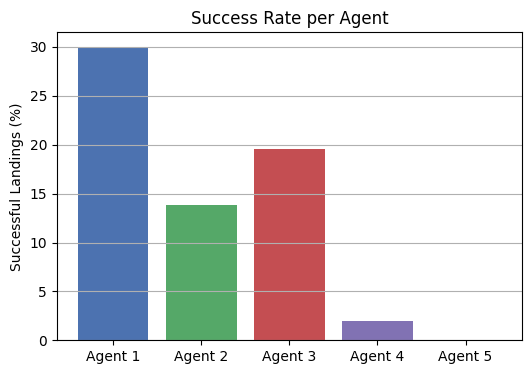

In [ ]:
import matplotlib.pyplot as plt
# Calculate success rate for each agent (% of episodes with reward ≥ 100)
success_rate = np.mean(success_flags, axis=1) * 100

# Plot as a bar chart
plt.figure(figsize=(6, 4))
agents = [f"Agent {i+1}" for i in range(5)]
plt.bar(agents, success_rate, color=['#4c72b0', '#55a868', '#c44e52', '#8172b3', '#ccb974'])
plt.title("Success Rate per Agent")
plt.ylabel("Successful Landings (%)")
plt.grid(axis='y')
plt.show()

## 🚀 Part 6: Fuel Efficiency vs. Landing Strategy

Another observation stood out to Lena:  
**Agent 3 and Agent 5 had much higher success rates** than the others.

- For example, **Agent 5 succeeded in over 60%** of episodes.
- Meanwhile, **Agent 1** only managed to land safely in about 10–15% of the time.

Even though the team as a whole did not succeed every time, it was clear that **at least one or two agents learned how to land correctly** in almost every trial.

Lena smiled and thought to herself:
> *“Luckily, this is a team effort. Even if some stumble, one always carries the flag forward.”*

---

### 🔥 Fuel Usage: Quantity vs. Quality

Fuel is a limited resource on lunar missions. Efficient landing isn’t just about touching down — it’s about using as little fuel as possible.

Lena recorded how many times each agent fired the **main engine** per episode. This served as a **proxy for fuel consumption**, since the main engine burns significantly more fuel than the side thrusters (which were ignored here for simplicity).

---

### 🤔 Surprising Insight

The results were unexpected:

- **Agent 5**, despite being highly successful, had the **highest average fuel usage**.
- This seemed counterintuitive — shouldn’t the most successful agent be the most efficient?

But Lena realized this made sense. Agent 5 wasn’t afraid to **spend fuel to control its descent more precisely**, prioritizing safety over economy.

Meanwhile, **Agent 3** managed to land well with **fewer engine firings**, showing a more conservative strategy.

Less successful agents either:
- Fired too little (and crashed due to lack of control), or
- Fired too much (wasting fuel without improving stability).

These results helped Lena understand that **agents learn different policies**, some of which are risk-tolerant, others more efficient.

---

### 🎞️ Visualizing the Best Agent

Finally, Lena chose to visualize a landing from the best-performing agent.

This time, she ran the simulation **with no exploration** — the agent would always choose the action with the highest Q-value. This showed what the agent had truly learned after 500 episodes.

Below is the code that captures this test episode and creates a **GIF animation** of the landing.


/usr/local/lib/python3.11/dist-packages/gym/core.py:43: DeprecationWarning: WARN: The argument mode in render method is deprecated; use render_mode during environment initialization instead.
See here for more information: https://www.gymlibrary.ml/content/api/
  deprecation(
/usr/local/lib/python3.11/dist-packages/imageio/plugins/pillow.py:409: DeprecationWarning: The keyword `fps` is no longer supported. Use `duration`(in ms) instead, e.g. `fps=50` == `duration=20` (1000 * 1/50).
  warnings.warn(


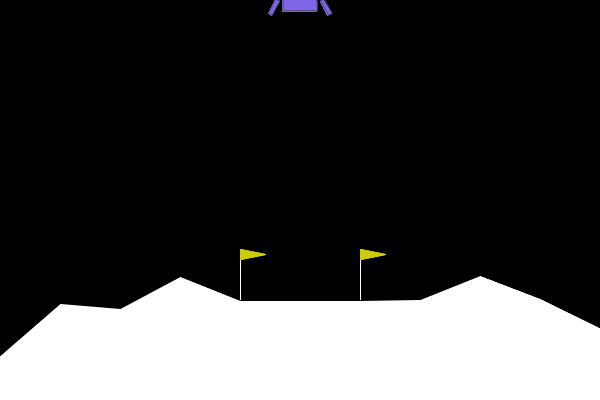

In [ ]:
import imageio
from IPython.display import Image as IPyImage

# Select the best-performing agent (e.g., Agent 5)
best_agent_idx = np.argmax(success_rate)
best_net = agent_networks[best_agent_idx]

# Reset environment
state = env.reset()
state = np.array(state, dtype=np.float32)
done = False
frames = []

while not done:
    frame = env.render(mode="rgb_array")
    frames.append(frame)

    state_tensor = torch.from_numpy(state)
    with torch.no_grad():
        action = int(torch.argmax(best_net(state_tensor)).item())

    next_state, _, done, _ = env.step(action)
    state = np.array(next_state, dtype=np.float32)

env.close()

# Save the animation as GIF
gif_path = f"agent_{best_agent_idx+1}_landing.gif"
imageio.mimsave(gif_path, frames, fps=30)

# Display the animation
IPyImage(filename=gif_path)

In [ ]:
!apt-get update
!apt-get install ffmpeg

Hit:1 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:2 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Get:3 http://archive.ubuntu.com/ubuntu jammy-backports InRelease [127 kB]
Get:4 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,632 B]
Get:5 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease [1,581 B]
Get:6 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Get:7 https://r2u.stat.illinois.edu/ubuntu jammy InRelease [6,555 B]
Hit:8 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:9 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:10 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Get:11 http://archive.ubuntu.com/ubuntu jammy-updates/multiverse amd64 Packages [55.7 kB]
Get:12 http://archive.ubuntu.com/ubuntu jammy-updates/universe amd64 Packages [1,538 kB]
Get:13 http://archive.ubuntu.com/ubuntu jammy-updates

In [ ]:
import imageio
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from IPython.display import HTML, Image, display
import os

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
MODEL_DIR = "/content/lunar_models"
GIF_DIR = "/content/drive/MyDrive/ColabNotebooks/lunar_outputs/gifs"
MP4_DIR = "/content/lunar_outputs/mp4s"
DRIVE_DIR = "/content/lunar_outputs"
def display_video(video):
    fig = plt.figure(figsize=(6, 4), frameon=False)
    mov = []

    for i in range(len(video)):
        img = plt.imshow(video[i], animated=True)
        plt.axis('off')
        mov.append([img])

    plt.subplots_adjust(left=0, right=1, top=1, bottom=0)
    ani = animation.ArtistAnimation(fig, mov, interval=30, repeat_delay=1000)
    plt.close()
    return ani

Mounted at /content/drive


In [ ]:
import os
import re
from google.colab import drive
drive.mount('/content/drive')
mp4_folder = "/content/drive/MyDrive/ColabNotebooks/lunar_outputs/mp4s"
best_reward = float('-inf')
best_video_path = None

for fname in os.listdir(mp4_folder):
    match = re.match(r"episode_(\d+)_reward_([-]?\d+).mp4", fname)
    if match:
        reward = int(match.group(2))
        if reward > best_reward:
            best_reward = reward
            best_video_path = os.path.join(mp4_folder, fname)

if best_video_path:
    video = imageio.mimread(best_video_path, memtest=False)
    display(HTML(display_video(video).to_html5_video()))
else:
    print("No valid MP4 file found.")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


FileNotFoundError: [Errno 2] No such file or directory: '/content/lunar_outputs/mp4s'

In [ ]:
from IPython.display import display, HTML

html_code = """
<table>
<tr>
<td><img src="agent_3_landing.gif" width="300"></td>
<td><video width="300" controls><source src="lunar_highspeed.mp4" type="video/mp4"></video></td>
</tr>
</table>
"""
display(HTML(html_code))

## 🎓 Part 7: Reflections and Final Thoughts

Lena watched the simulation GIF closely. On the screen, a tiny lunar lander adjusted its descent with small side thrusts, pulsed the main engine to reduce speed, and gently touched down on the landing pad. Both legs touched the ground, and the vehicle wobbled briefly before coming to a full stop.

It had worked!

Lena smiled. This was proof that **at least one of her agents had truly learned the task**. Even though all agents shared the same learning algorithm and parameters, only some of them reached this level of success. Others tilted early, overspent fuel, or failed to stabilize.

---

### 🤝 Collective Learning vs. Solo Trials

Training **a team of agents** proved to be more effective than relying on a single learner. Each agent explored a different path, and some of them discovered strong strategies.

Statistically, this made sense: if the chance of one agent succeeding is only **20%**, then the chance that **at least one out of five agents** succeeds becomes:

\[ 1 - (1 - p)^N = 1 - (1 - 0.20)^5 \approx 0.67 \]

This means a **67% chance of success** — a big improvement over training a single agent.

> Distributed learning with independent agents improves performance. This is supported by research as well ([arXiv.org](https://arxiv.org/abs/2107.01401)).

Each agent failed or succeeded **in different ways**. Lena realized that the team's collective knowledge was **richer than that of any single agent**.

---

### 🎲 Why Some Agents Fail

There are solid reasons why some agents never learned to land:
- Reinforcement learning is inherently **stochastic**.
- Random initialization, different action sequences, and unlucky exploration can cause some agents to plateau or fail.
- Especially with DQNs, **small changes** in hyperparameters or random seeds can lead to vastly different results.

> Studies confirm that DQN agents often **fail to solve LunarLander-v2** under default settings ([PyTorch Forum](https://discuss.pytorch.org/t/dqn-on-lunar-lander-v2-fails-to-solve/132861)).

Lena's experience echoed this: **parallel agents increased the chance of success**, and the variation between their learning trajectories offered insight into strategy diversity.

She started imagining future improvements:
- Could successful agents **share knowledge** with weaker ones?
- Could failing agents be **retrained using demonstrations** from the best performer?

This idea connects with **Federated Reinforcement Learning**, where decentralized agents collaborate to build a stronger collective policy ([arXiv.org](https://arxiv.org/abs/1901.08277)).

---

## 📝 Final Takeaways

With the simulations complete, Lena leaned back with a cup of coffee and reflected before reporting to Dr. Thorne.

She had learned a lot — not just about landers, but about learning itself.

---

### ✅ What I Learned

**📌 Importance of Hyperparameters**  
In reinforcement learning, tuning parameters like **learning rate (\alpha)**, **discount factor (\gamma)**, and **epsilon** is critical. Lena saw firsthand how:
- A high learning rate destabilizes learning.
- Gamma controls long-term vs. short-term reward tradeoffs.
- Epsilon decay determines exploration quality.

---

**📌 Power of Multi-Agent Training**  
Training multiple agents increases the chance that **at least one** discovers a good policy. It’s a practical way to bypass the randomness that can doom solo agents.

---

**📌 Randomness Produces Different Outcomes**  
Even with the same algorithm, agents trained with different random seeds produced **wildly different results**. This underlines how important initial conditions and randomness are in reinforcement learning.

---

**📌 Value of Visualization**  
By graphing reward curves, fuel usage, and success rates, Lena could understand not just what worked — but **why**. Visual analysis helped her debug and compare agents effectively.

---

**📌 Simplicity Can Go a Long Way**  
Even with a basic DQN and a small neural network, Lena made solid progress. This prototype showed that you don’t need complex architectures to start solving meaningful problems ([Goodboychan’s Notebook](https://goodboychan.github.io/python/reinforcement_learning/pytorch/udacity/2020/06/21/DQN-LunarLander.html)).

---

With these lessons in hand, Lena was ready to move on. Perhaps the next step would be to build a **shared policy** that combined the strengths of all her agents.

As the lights in the control room dimmed and the charts faded from the screens, Lena knew one thing:
> *“We’re ready for the next mission.”*

---

## 📚 References

- [OpenAI Gym: LunarLander-v2 Documentation](https://www.gymlibrary.dev/environments/box2d/lunar_lander/) – Explains reward structure and success threshold.
- [PyTorch Forums: DQN Lunar Lander Failure Case](https://discuss.pytorch.org/t/dqn-on-lunar-lander-v2-fails-to-solve/132861) – Shows that not all DQN agents succeed.
- [Federated Reinforcement Learning Research (arXiv)](https://arxiv.org/abs/1901.08277) – Discusses decentralized collaborative learning.
- [Goodboychan’s DQN Notebook](https://goodboychan.github.io/python/reinforcement_learning/pytorch/udacity/2020/06/21/DQN-LunarLander.html) – Demonstrates DQN on LunarLander-v2 with simple architecture.
- [Gym Official Docs](https://www.gymlibrary.dev/) – General info on reward structure, heuristics, and environment mechanics.
